### **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### `Initial Setup`

In [1]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Import library modeling
import pycaret

import warnings
warnings.filterwarnings('ignore')

### `Business Problem Understanding`

**Problem Statement**

Karena harga rumah yang sangat bervariasi, maka menentukan harga rumah yang sesuai sangatlah penting bagi yang ingin menjual dan membeli rumah.

**Salah satu tantangan terbesar bagi agen properti/broker adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial, serta dapat memberikan pengalaman positif penjual dan pembeli rumah.**

Mengingat kebebasan penuh kepada pemilik rumah untuk menentukan harga rumah mereka, dengan hanya memberikan petunjuk minimal yang memungkinkan tuan rumah membandingkan tempat serupa di lingkungan mereka untuk mendapatkan harga yang kompetitif. Pemilik rumah pun dapat memasukkan harga yang lebih tinggi untuk fasilitas tambahan apa pun yang mereka anggap perlu. **Dengan meningkatnya jumlah jual beli rumah, menentukan harga yang tepat untuk dapat kompetitif di lingkungan sekitar sangatlah penting**.

**Goals**

Berdasarkan permasalahan tersebut, kita sebagai agen properti/broker tentu perlu menggunakan 'tool' yang dapat memprediksi serta membantu (dalam hal ini jual beli rumah) untuk dapat **menentukan harga rumah yang tepat**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu rumah, lokasi, umur rumah, jumlah ruangan, jumalah kamar tidur, rumah tangga, dan jarak dengan pantai akan menambah keakuratan prediksi harga rumah, yang mana dapat mendatangkan keuntungan bagi agen properti/broker.

Bagi pembeli rumah, prediction tool yang dapat memberikan prediksi harga secara fair tentu dapat meningkatkan nilai investasi rumah yang dibeli.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan harga satu rumah dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu agen properti/broker untuk dapat menyediakan 'tool' prediksi harga rumah yang baru masuk dalam daftar, yang mana akan berguna untuk agen properti/broker dalam menentukan harga listing-nya.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### `Data Understanding`

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| longitude | Ukuran seberapa jauh rumah berada di barat; nilai yang lebih negatif lebih jauh ke barat |
| latitude | Ukuran seberapa jauh rumah berada di bagian utara; nilai yang lebih tinggi lebih jauh ke utara |
| housing_median_age | Usia rata-rata rumah dalam satu blok; angka yang lebih rendah adalah bangunan yang lebih baru |
| total_rooms | Jumlah total ruang dalam satu blok |
| total_bedrooms | Jumlah total kamar tidur dalam satu blok |
| population | Jumlah total orang yang tinggal dalam satu blok |
| households | Jumlah total rumah tangga, yaitu sekelompok orang yang berada dalam satu unit rumah, untuk satu blok |
| median_income | Pendapatan rata-rata untuk anggota keluarga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS) |
| ocean_proximity | Jarang terdekat dengan pantai |
| median_house_value | Nilai rumah median untuk anggota keluarga dalam satu blok (diukur dalam Dolar AS) |

In [2]:
data = pd.read_csv(r'D:\purwadhika\modul3\CapstoneProject3\data\raw\data_california_house.csv')
print(f'Jumlah baris dan kolom: {data.shape}')

data.sample(5)

Jumlah baris dan kolom: (14448, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13156,-122.02,37.24,28.0,2796.0,365.0,1085.0,363.0,10.6834,<1H OCEAN,500001.0
7997,-117.29,33.05,28.0,1146.0,338.0,672.0,292.0,3.1667,NEAR OCEAN,300000.0
14313,-117.73,34.09,30.0,2345.0,496.0,1897.0,454.0,2.4375,INLAND,112100.0
108,-122.02,37.59,18.0,1165.0,333.0,855.0,319.0,3.6923,NEAR BAY,213200.0
6289,-117.88,33.65,24.0,4879.0,756.0,1777.0,754.0,5.9055,<1H OCEAN,477300.0


**Menambah Kolom County**
https://catalog.data.gov/dataset/tiger-line-shapefile-2019-state-california-current-county-subdivision-state-based

In [3]:
# import geopandas as gpd
# from shapely.geometry import Point

# # Ubah DataFrame menjadi GeoDataFrame
# # 'Point' mengambil dua argumen: longitude dan latitude
# gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude), crs="EPSG:4326")

# # data batas-batas county berdasarkan california county bounderies shapefile
# counties = gpd.read_file("tl_2019_06_cousub.shp")

# # memastikan data lokasi dan data county memiliki CRS (Coordinate Reference System) yang sama
# gdf = gdf.to_crs(counties.crs)

# # Gabungkan data
# joined = gpd.sjoin(gdf, counties, op='within')

# # Ambil hanya kolom df dan kolom 'NAME' dan 'NAMELSAD'
# columns_to_keep = data.columns.tolist() + ['NAMELSAD']
# df = joined[columns_to_keep]

#### **Initial Assesment**

In [4]:
pd.DataFrame({
    'column': data.columns.values,
    'type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,column,type,null,negative,n_unique,sample_unique
0,longitude,float64,0.000000,False,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,float64,0.000000,False,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,float64,0.000000,False,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,float64,0.000000,False,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,float64,0.948228,False,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,float64,0.000000,False,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,float64,0.000000,False,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,float64,0.000000,False,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,object,0.000000,False,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,float64,0.000000,False,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


__Insight :__
* Dataset terdiri dari 10 kolom dan 14.448 baris
* Variabel numerik: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value
* Variabel categorical: ocean_proximity
* Terdapat missing value sebesar 0.9% pada kolom total_bedrooms

#### **Numerical variable**

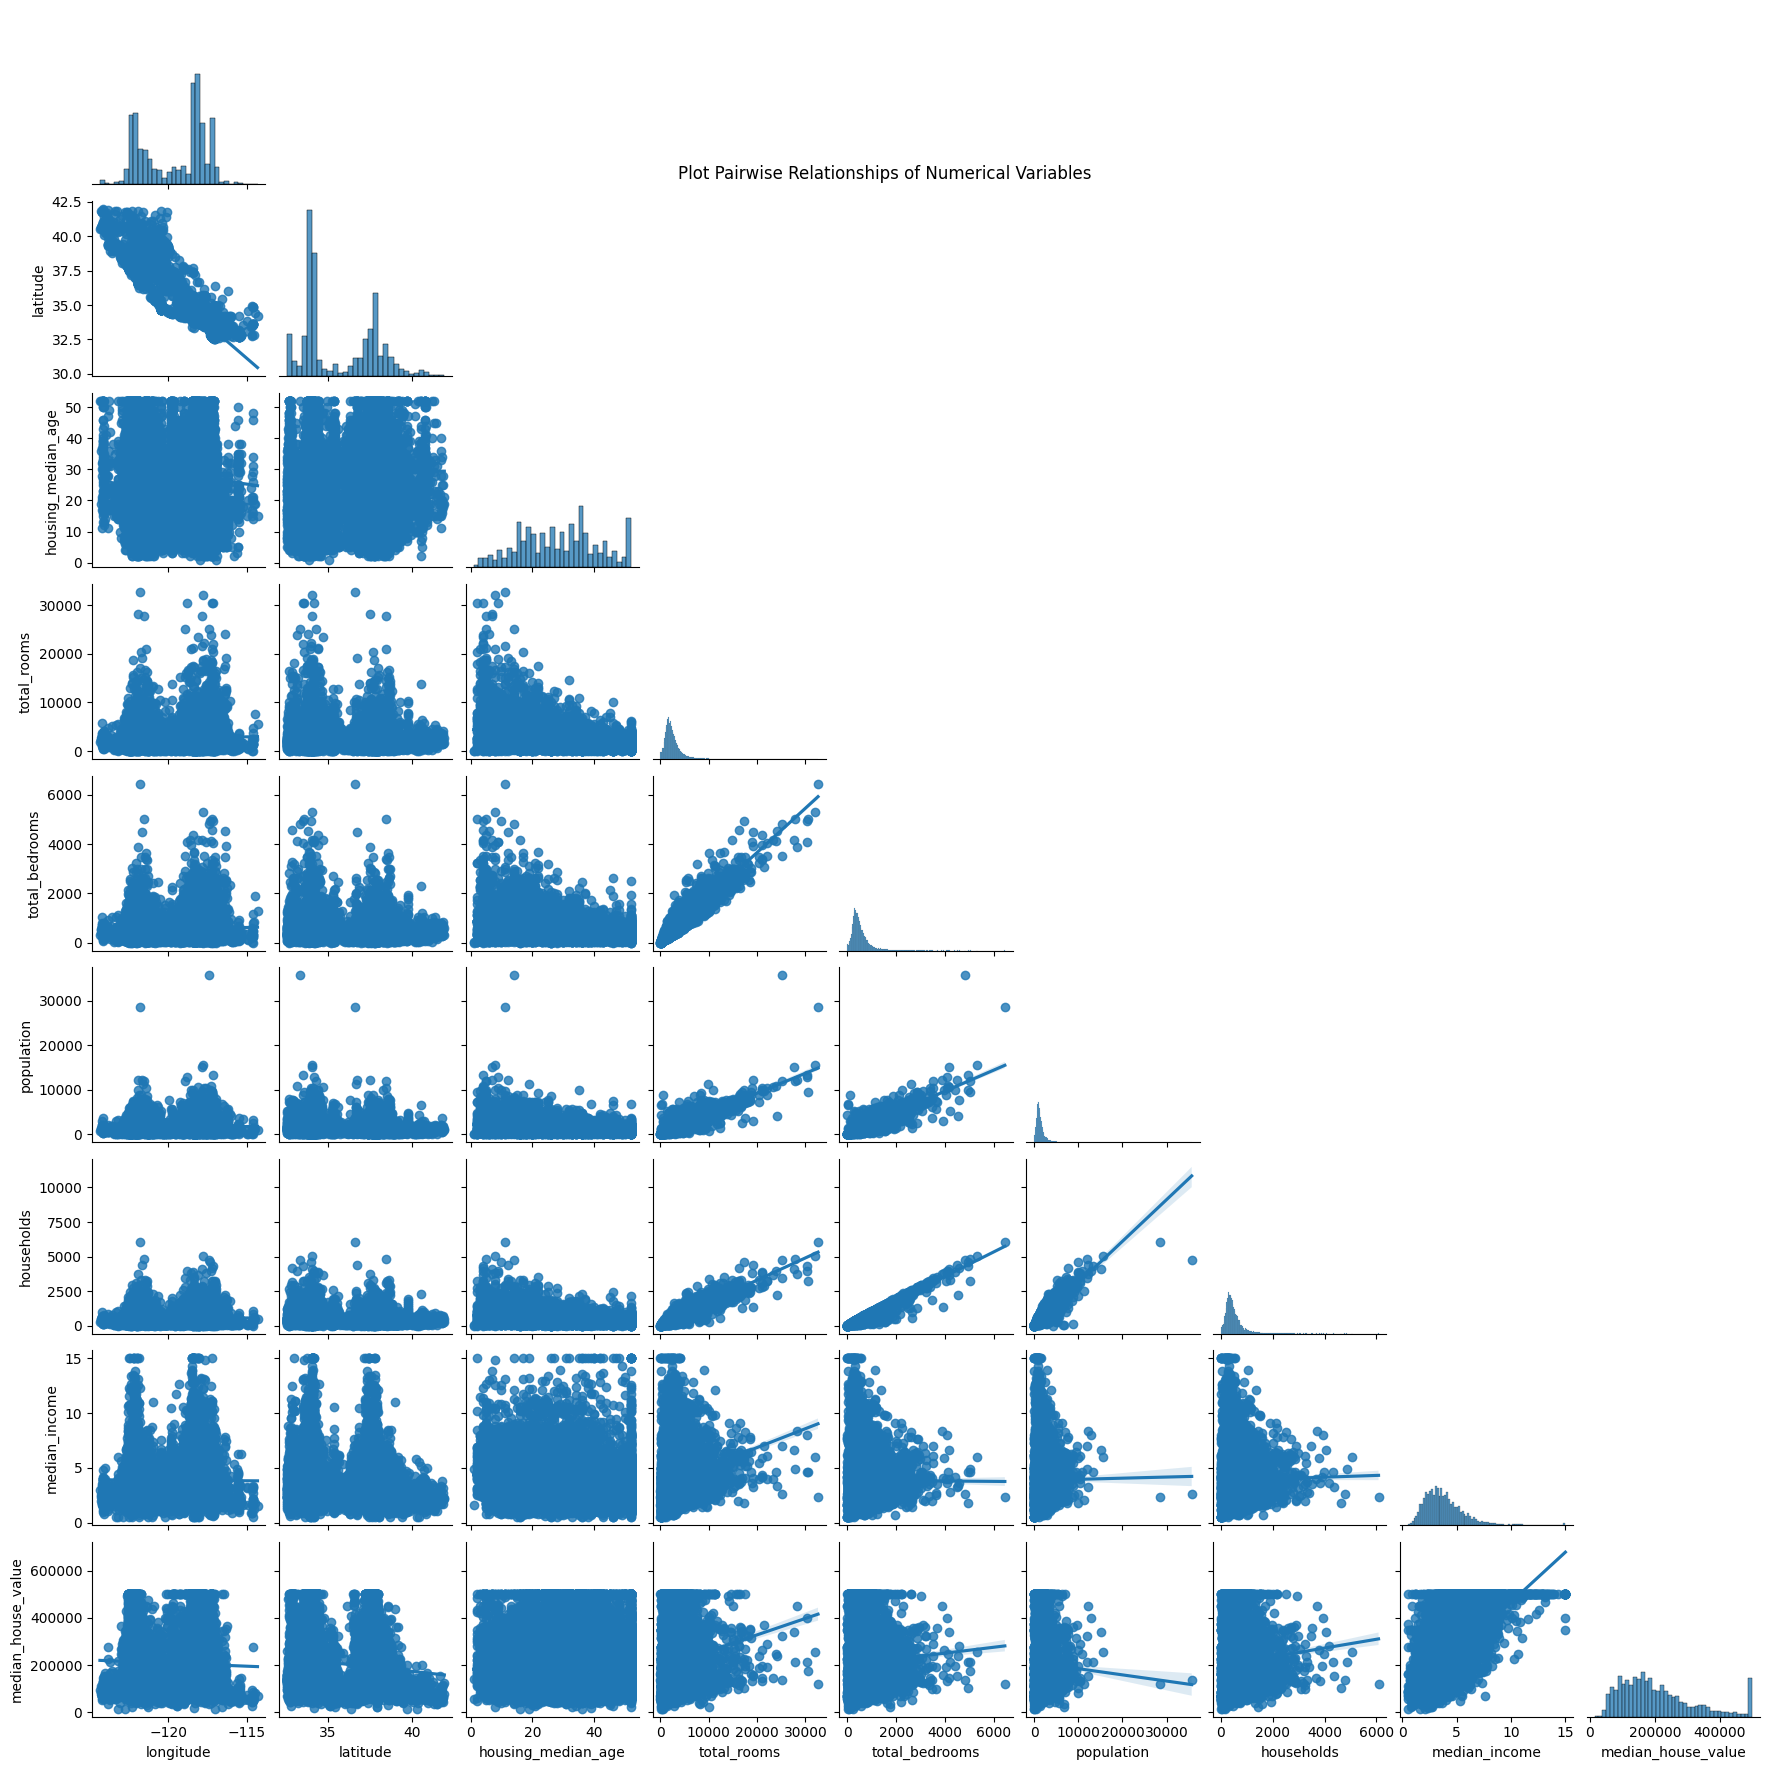

In [5]:
numerical = [var for var in data.columns if data[var].dtype != 'category']

graph = sns.pairplot(data[numerical], height=2.0, corner=True, kind='reg')
graph.fig.suptitle("Plot Pairwise Relationships of Numerical Variables", y=0.9)
plt.show()

__Insight :__
* Distribusi data pada variabel di dataset tergolong tidak normal
* Variabel numerik pada dataset tergolong variabel continue
* Pada kolom "total_rooms", "total_bedrooms", "population", dan "household" menunjukkan korelasi linear positif, sedangkan pada kolom "housing_median_age" dan "media_house_value" menunjukkan korelasi linear negatif


#### **Categorical variable**

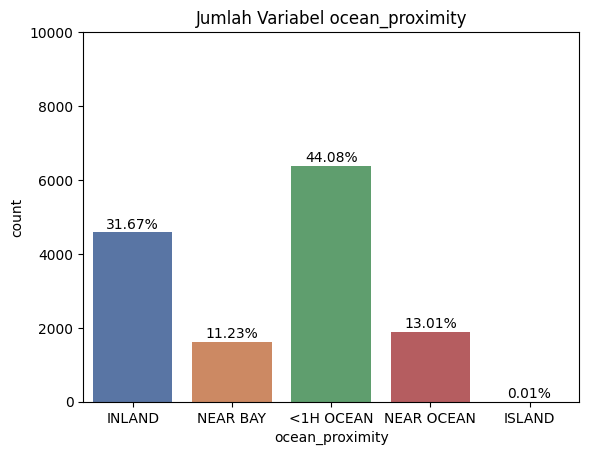

In [6]:
plt.subplot()
plt.title("Jumlah Variabel ocean_proximity")
ax = sns.countplot(data=data, x="ocean_proximity", palette='deep')
ax.set_ylim([0, 10000])

for p in ax.patches:
    percentage = f'{100 * p.get_height()/len(data):.2f}%\n'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

In [7]:
data.ocean_proximity.value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

__Insight :__
* "<1H OCEAN" memiliki jumlah tertinggi dengan nilai 44,08%, ini berarti sebagian besar rumah berlokasi di daerah dekat laut(kurang dari 1 jam perjalanan).
* "ISLAND" memiliki jumalah paling sedikit dengan nilai 0,01%, ini berarti hanya sedikit rumah yang berlokasi di pulau.

Text(0.5, 1.0, 'Correlation Matrix')

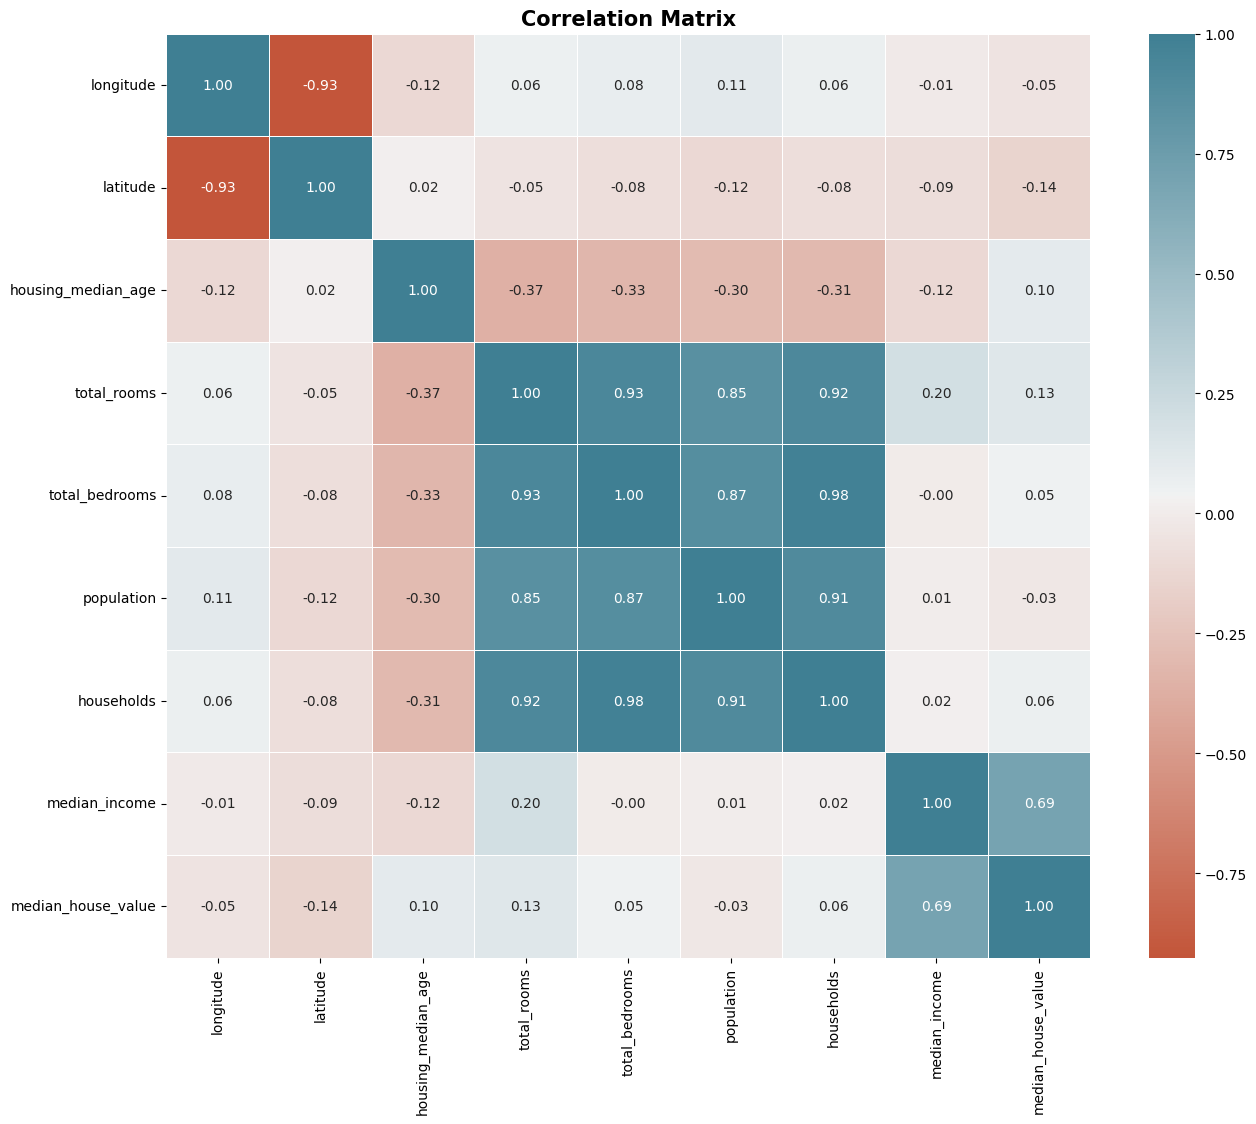

In [8]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

Correlation matrix menunjukkan bahwa "median_house_value" sebagai target memiliki korelasi positif terhadap "median_income". Ini berarti semakin tinggi nilai "median_income", makan semakin tinggi juga nilai dari "median_house_value"

Text(0.5, 1.0, 'Distribution of households')

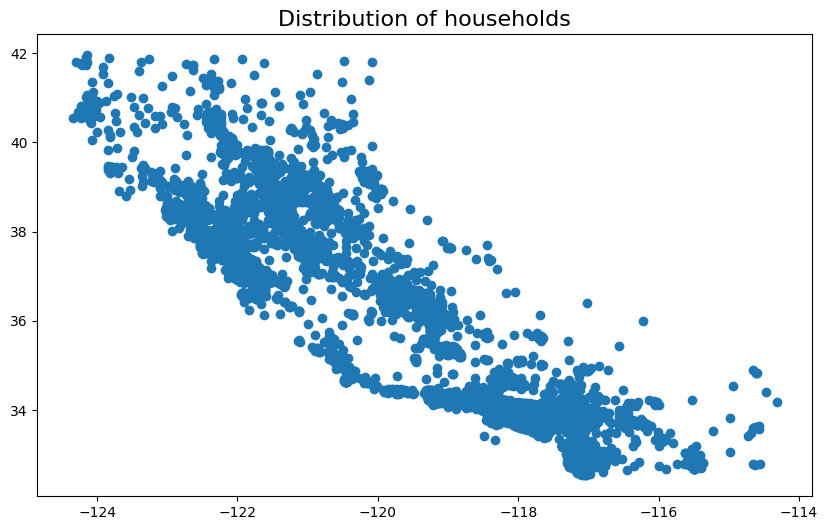

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.title("Distribution of households",size=16)

Text(0.5, 1.0, 'Distribution of households')

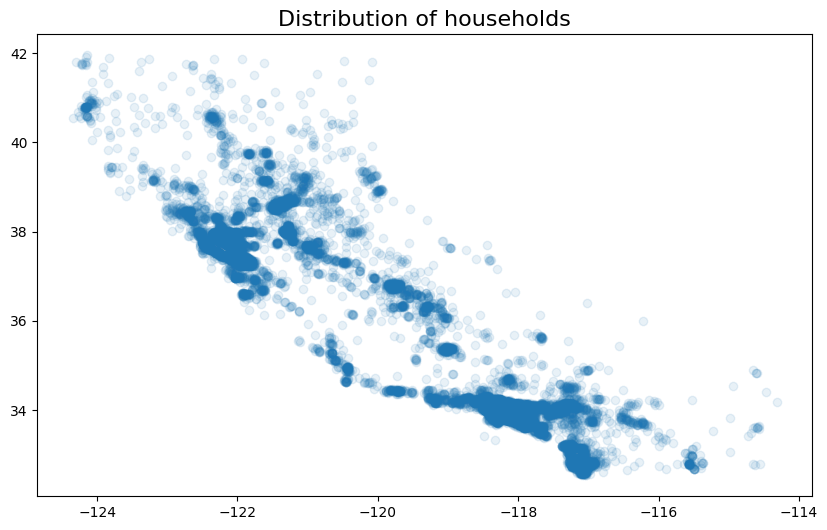

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

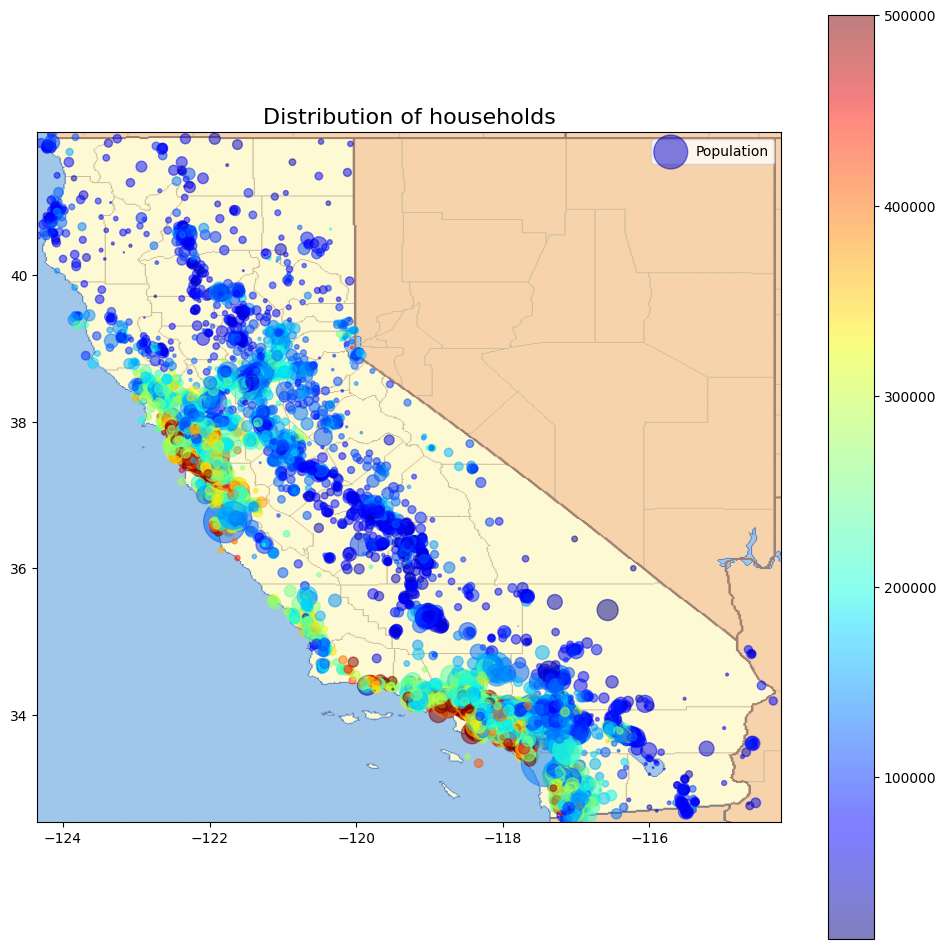

In [11]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,s=data['population']/30,c=data['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

Dari plot di atas kita bisa menyimpulkan bahwa:
Harga rumah sangat terkait dengan lokasi dan kepadatan penduduk.
Harga rumah di dekat laut lebih tinggi kecuali di California utara, ditandai dengan poin yang berwarna merah.

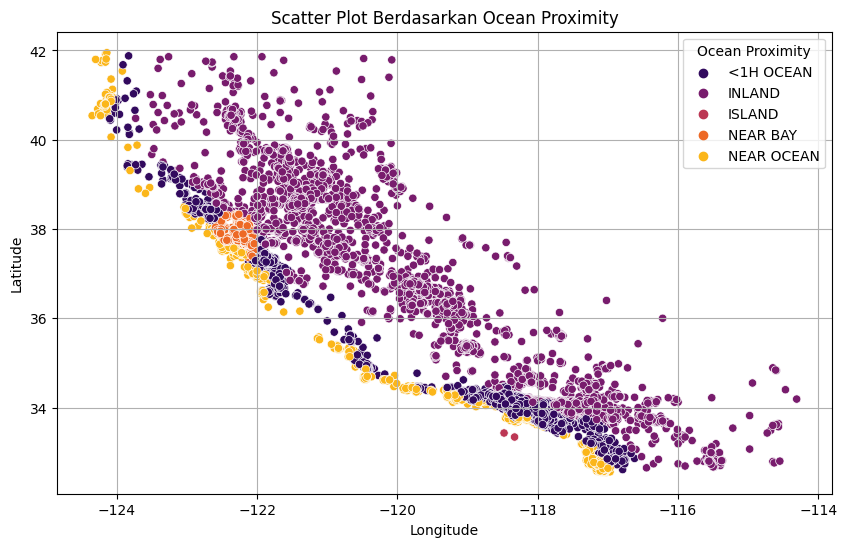

In [12]:
import matplotlib.pyplot as plt

data['ocean_proximity'] = data["ocean_proximity"].astype('category')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='ocean_proximity', palette='inferno')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot Berdasarkan Ocean Proximity')

plt.legend(title='Ocean Proximity')

plt.grid(True)
plt.show()

Dari plot diatas dapat dilihat persebaran lokasi rumah berdasarkan ocean procimity.

In [13]:
print(f'Jumlah baris dan kolom: {data.shape}')

Jumlah baris dan kolom: (14448, 10)


### `Data Preparation`

In [14]:
data_model = data.copy()
data_model.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


#### **Data Wrangling**

**Missing Value**, .....

Deteksi dan kuantifikasi missing value:

In [15]:
pd.DataFrame({'null': [data_model[col].isna().sum() for col in data_model.columns]}, index=data.columns.values)

,null
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,137
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


<Axes: >

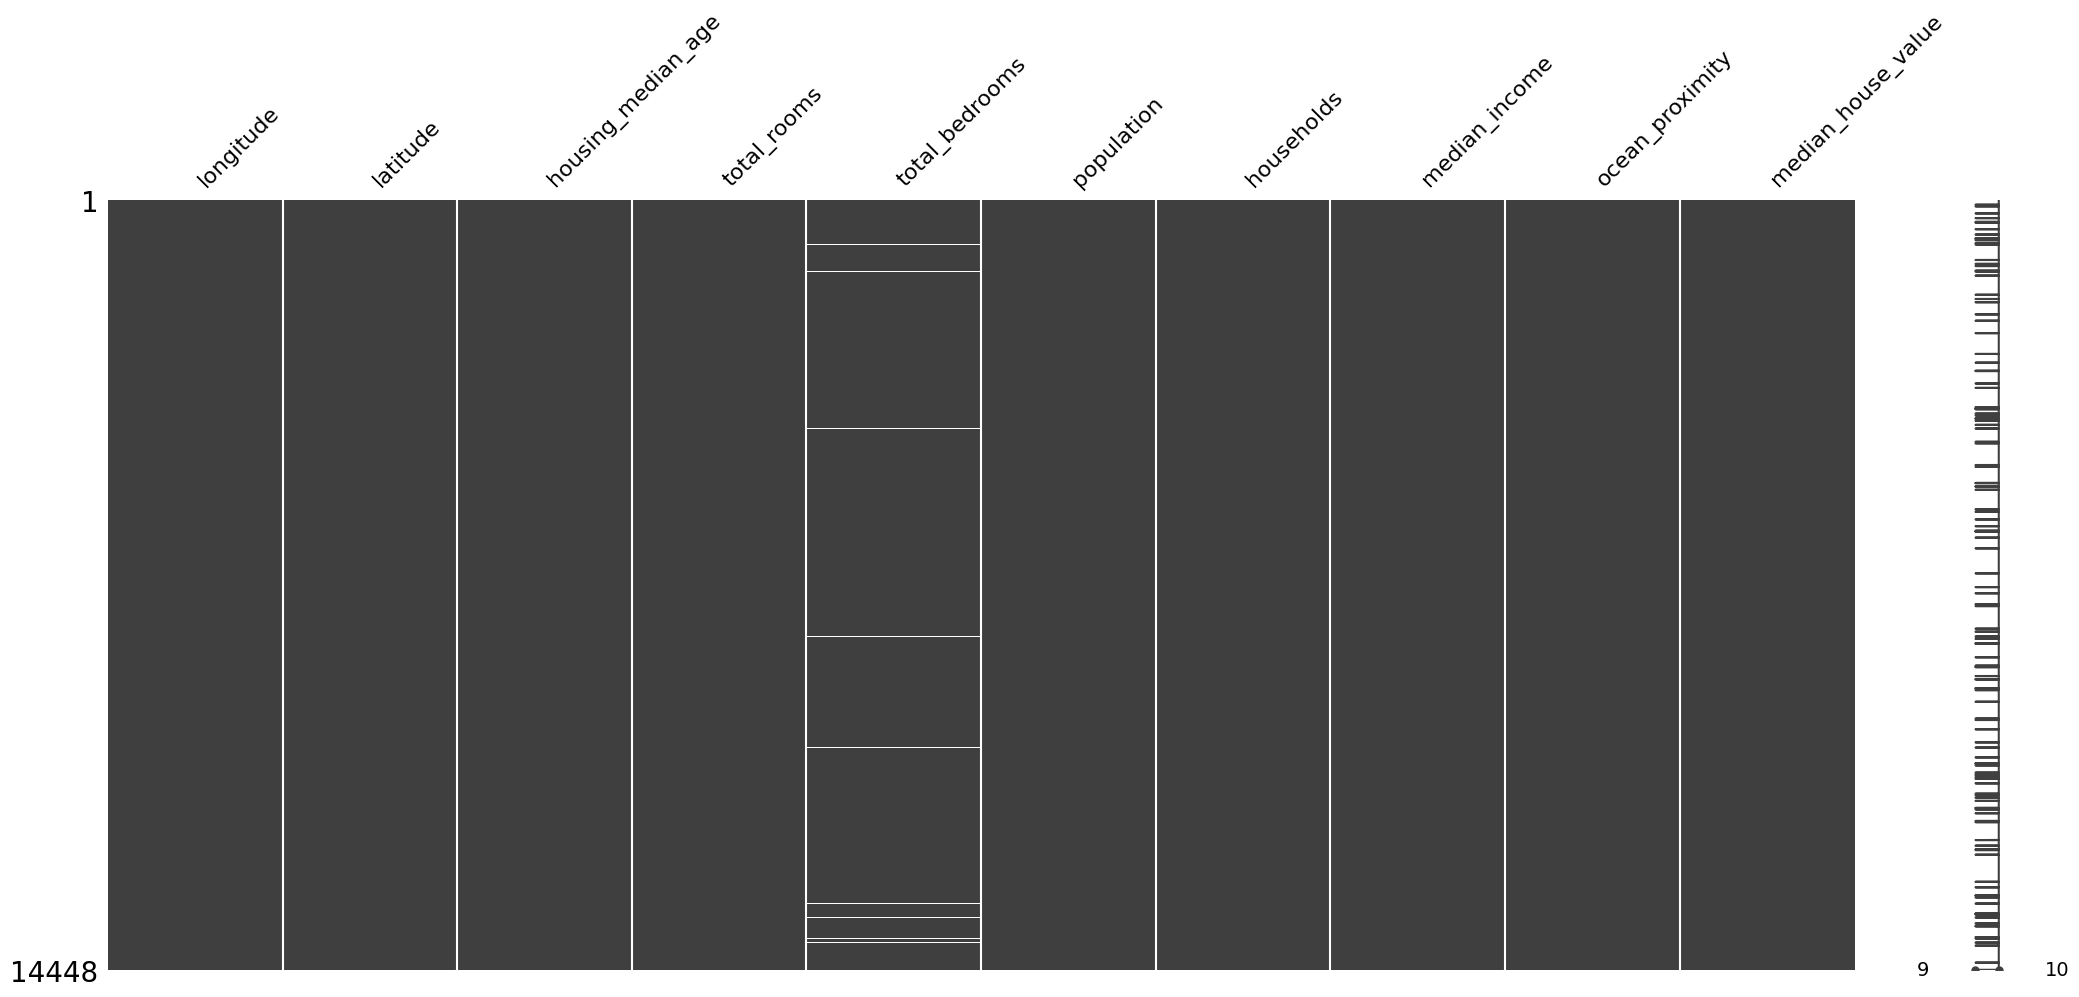

In [16]:
msno.matrix(data_model)

__Insight :__ 
Terdapat 137 data missing value pada kolom "total_bedrooms", dan polanya tidak saling berkaitan.

Handling missing value:

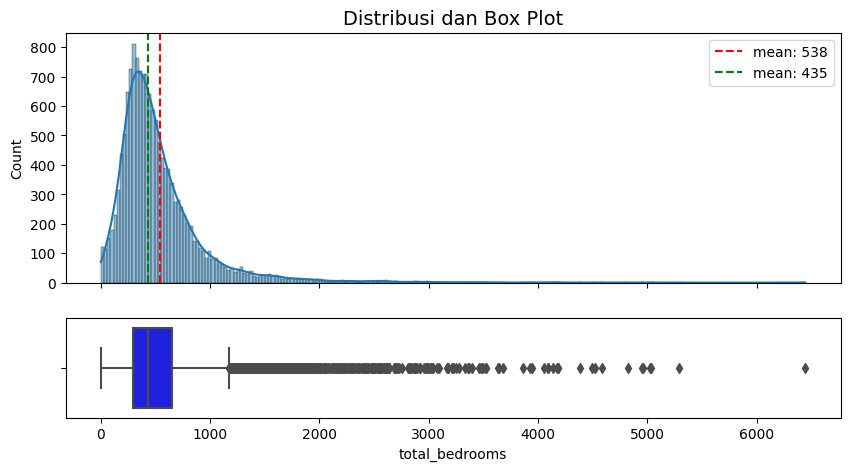

In [17]:
fig, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True, gridspec_kw={'height_ratios':[5,2]})

sns.histplot(x=data_model.total_bedrooms, kde=True, ax=ax1)
sns.boxplot(x=data_model.total_bedrooms, ax=ax2, color='Blue')

ax1.axvline(x=data_model['total_bedrooms'].mean(), color='red', label=f"mean: {round(data['total_bedrooms'].mean())}", linestyle='--')
ax1.axvline(x=data_model['total_bedrooms'].median(), color='green', label=f"mean: {round(data['total_bedrooms'].median())}", linestyle='--')

ax1.set_title('Distribusi dan Box Plot', fontsize=14)
ax1.set_xlabel('total_bedrooms', fontsize=12)

ax1.legend()

plt.show()

In [18]:
median_bedrooms = data_model.groupby(['households'])['total_bedrooms'].median()

def fill_missval(x):
    if pd.isnull(x['total_bedrooms']):
        median_value = median_bedrooms.get(x['households'])
        return median_value
    else:
        return x['total_bedrooms']

data_model['total_bedrooms'] = data_model.apply(fill_missval, axis=1)

data_model['total_bedrooms'].fillna(data_model['total_bedrooms'].median(), inplace=True)

data_model['total_bedrooms'] = data_model['total_bedrooms'].round().astype(int)

In [19]:
data_model['total_bedrooms'] = data_model['total_bedrooms'].astype(int)

In [20]:
pd.DataFrame({'null': [data_model[col].isna().sum() for col in data_model.columns]}, index=data.columns.values)

,null
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


__Insight :__ 
* Karena "total_bedrooms" memiliki distribusi data tidak normal dan memiliki korelasi yang kuat dengan "households", maka missing value pada "total_bedrooms" diinput dengan nilai median "total_bedrooms" yang dikelompokkan berdasarkan "households" yang sama.

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data:

In [21]:
print(f"Jumlah duplikasi data: {data_model[data_model.duplicated()].shape}")

Jumlah duplikasi data: (0, 10)


__Insight :__ 
Tidak memiliki nilai duplikat

**Rare label**, .....

Deteksi dan kuantifikasi rare value:

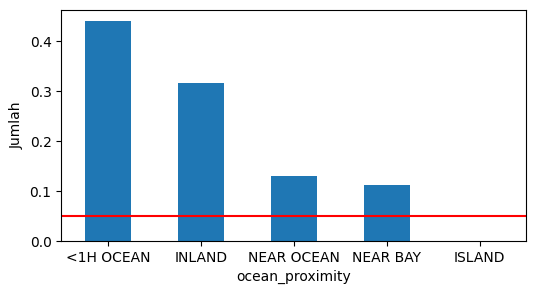

In [22]:
temp_df = pd.Series(data_model['ocean_proximity'].value_counts() / len(data_model))

plt.figure(figsize=(6, 3))
fig = temp_df.sort_values(ascending=False).plot.bar(rot=0)
fig.set_xlabel('ocean_proximity')

fig.axhline(y=0.05, color='red')
fig.set_ylabel('Jumlah')
plt.show()

In [23]:
data_model.ocean_proximity.value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

In [24]:
nearocean = data_model[data_model.ocean_proximity == 'NEAR OCEAN']
nearocean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,-119.337541,34.756860,29.350718,2622.367217,541.249601,1365.861629,505.529005,4.014166,249775.384247
std,2.343919,2.305216,11.898082,2063.813191,382.210905,1025.582699,353.552925,1.976662,123091.200118
min,-124.350000,32.540000,2.000000,15.000000,3.000000,8.000000,3.000000,0.643300,37500.000000
25%,-122.030000,32.780000,20.000000,1504.500000,311.000000,784.000000,296.000000,2.629150,150000.000000
50%,-118.240000,33.790000,29.000000,2197.000000,465.000000,1137.000000,433.000000,3.680600,228600.000000
75%,-117.180000,36.990000,37.000000,3146.500000,667.500000,1620.500000,616.000000,4.902200,325950.000000
max,-116.970000,41.950000,52.000000,30405.000000,4585.000000,12873.000000,4176.000000,15.000100,500001.000000


In [25]:
nearbay = data_model[data_model.ocean_proximity == 'NEAR BAY']
nearbay.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000
mean,-122.259679,37.803181,37.655980,2452.847719,506.860666,1208.284217,479.975339,4.179790,258512.974723
std,0.146658,0.185480,13.161926,1769.438069,361.020880,847.402585,337.545445,2.034724,123794.049463
min,-122.590000,37.350000,2.000000,8.000000,1.000000,8.000000,1.000000,0.499900,22500.000000
25%,-122.400000,37.730000,28.250000,1416.250000,284.000000,709.500000,272.000000,2.823625,162500.000000
50%,-122.250000,37.790000,39.000000,2079.500000,419.000000,1029.000000,401.500000,3.819200,230800.000000
75%,-122.140000,37.910000,52.000000,3011.250000,623.000000,1481.000000,590.000000,5.045850,347475.000000
max,-122.010000,38.340000,52.000000,18634.000000,3226.000000,8117.000000,3052.000000,15.000100,500001.000000


In [26]:
island = data_model[data_model.ocean_proximity == 'ISLAND']
island.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,-118.405000,33.38500,40.500000,1537.500000,402.500000,761.000000,302.00000,2.718750,351100.000000
std,0.106066,0.06364,16.263456,1161.776441,266.579257,479.418398,182.43355,0.161998,89943.982567
min,-118.480000,33.34000,29.000000,716.000000,214.000000,422.000000,173.00000,2.604200,287500.000000
25%,-118.442500,33.36250,34.750000,1126.750000,308.250000,591.500000,237.50000,2.661475,319300.000000
50%,-118.405000,33.38500,40.500000,1537.500000,402.500000,761.000000,302.00000,2.718750,351100.000000
75%,-118.367500,33.40750,46.250000,1948.250000,496.750000,930.500000,366.50000,2.776025,382900.000000
max,-118.330000,33.43000,52.000000,2359.000000,591.000000,1100.000000,431.00000,2.833300,414700.000000


__Insight :__ 
* Rata rata median_house_value untuk data yang termasuk ocean_proximity di NEAR OCEAN dan NEAR BAY hampir sama, dan juga masih sama-sama terletak disekitar laut atau pantai, maka dapat dijadikan 1 menjadi 1 kategori yaitu NEAR OCEAN. 
* Sedangkan untuk ISLAND akan di drop dengan alasan hanya memiliki 2 nilai dan tidak dapat di group berdasarkan kategori lain.

Handling rare value:

In [27]:
data_model = data_model[data_model['ocean_proximity'] != 'ISLAND']

In [28]:
def group_rareval(x):
    if x == 'NEAR OCEAN':
        return 'NEAR OCEAN'
    elif x == 'NEAR BAY':
        return 'NEAR OCEAN'
    elif x == 'INLAND':
        return 'INLAND'
    else:
        return '<1H OCEAN'

data_model['ocean_proximity'] = data_model['ocean_proximity'].apply(lambda x: group_rareval(x))

In [29]:
data_model.ocean_proximity.value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    3501
Name: ocean_proximity, dtype: int64

NEAR OCEAN dan NEAR BAY dijadikan menjadi 1 kategori yaitu NEAR OCEAN dan ISLAND telah di drop.

**Outlier,** .....

Deteksi dan kuantifikasi outlier:

In [30]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

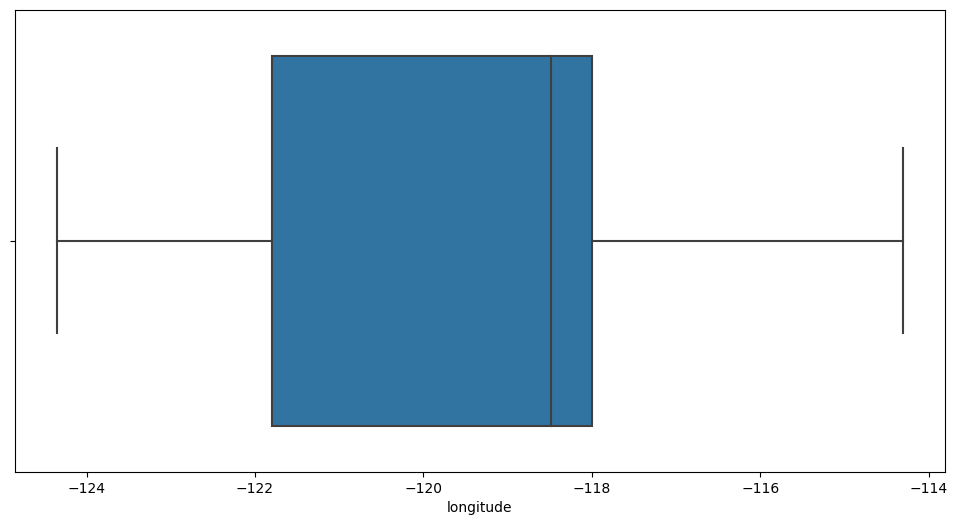

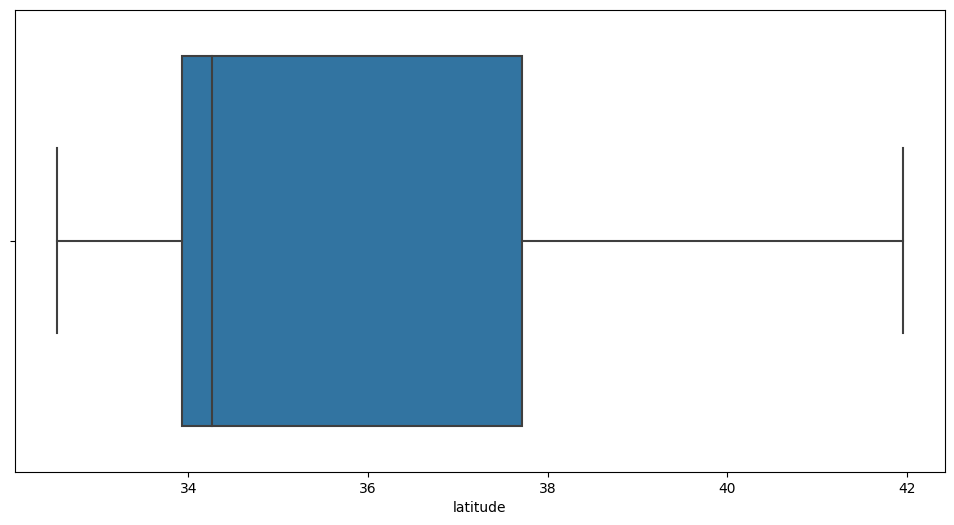

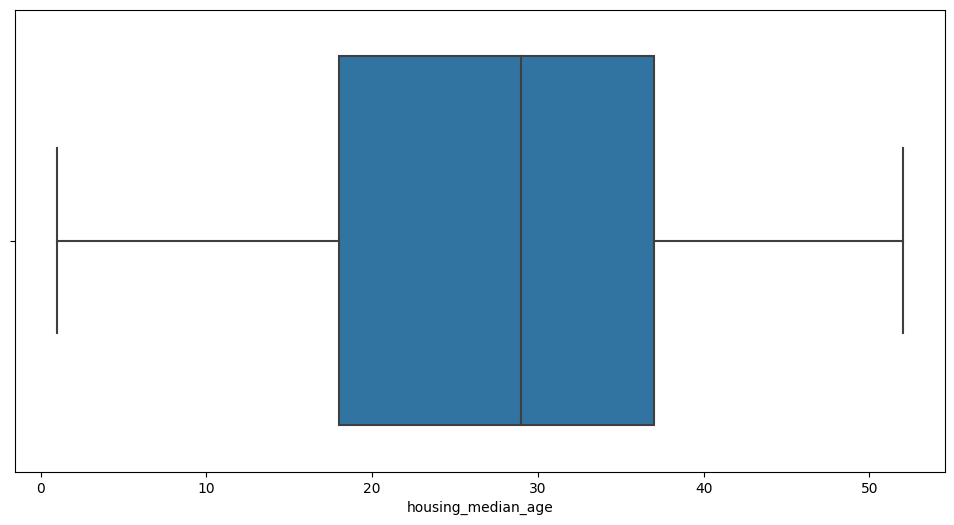

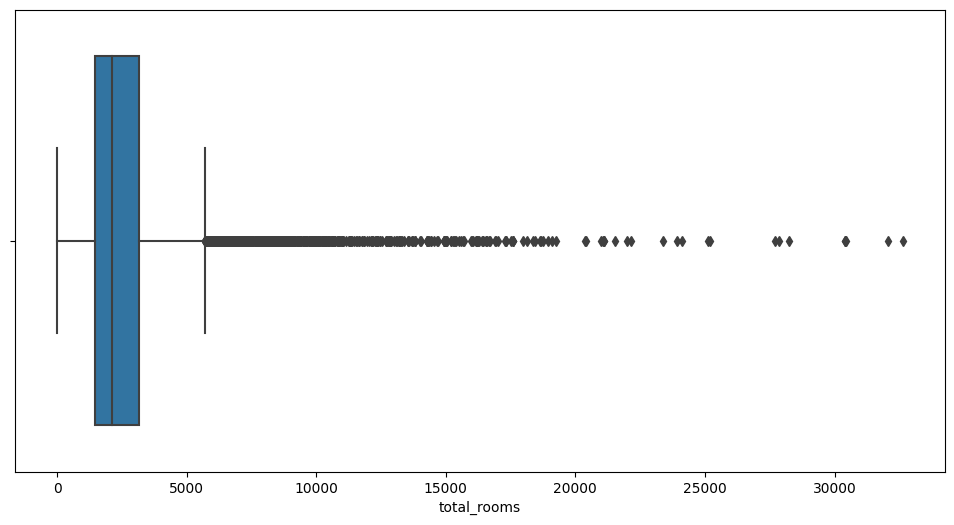

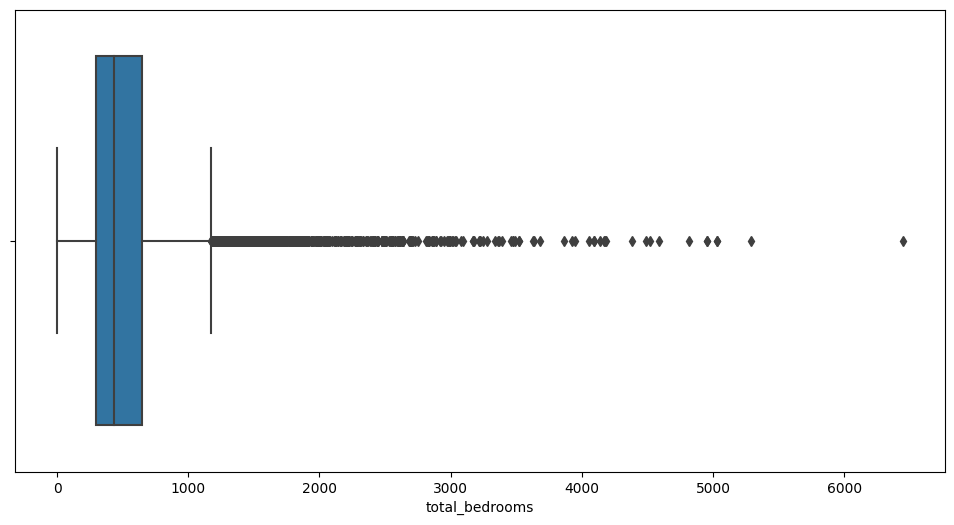

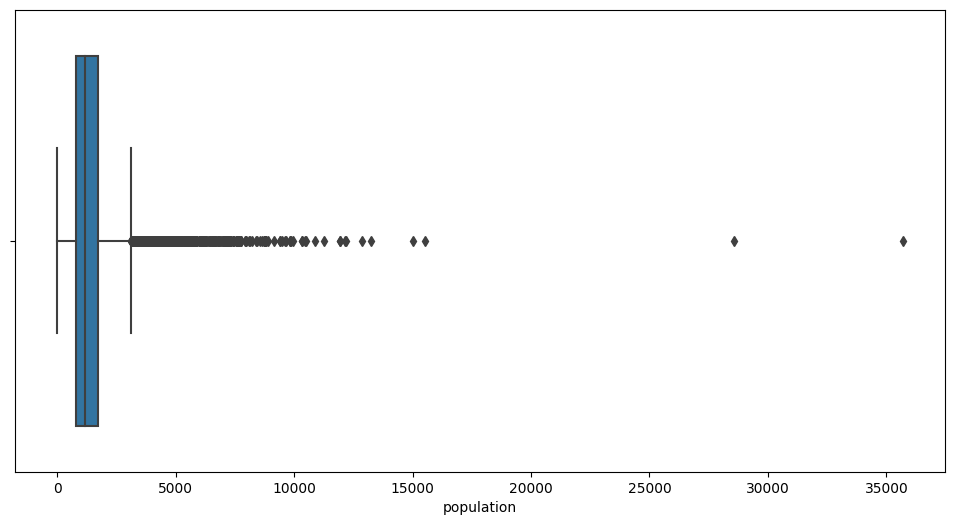

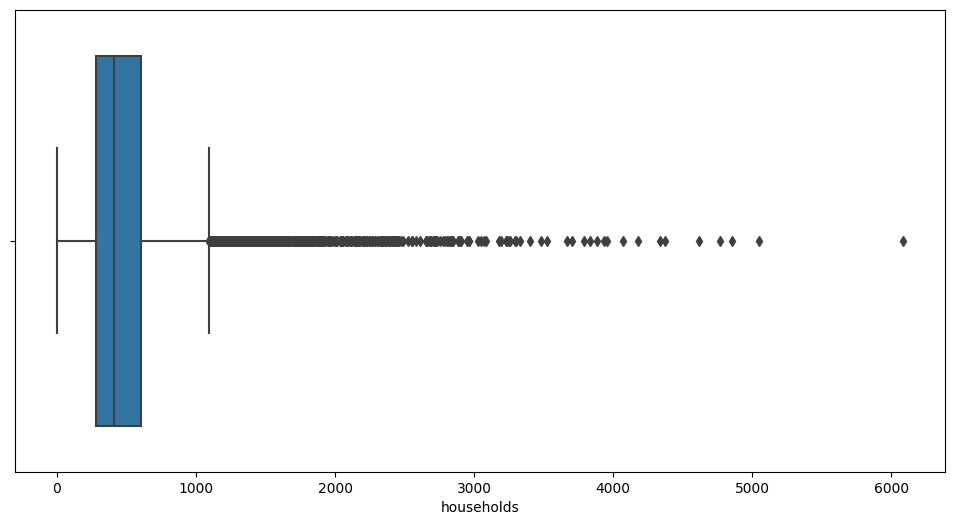

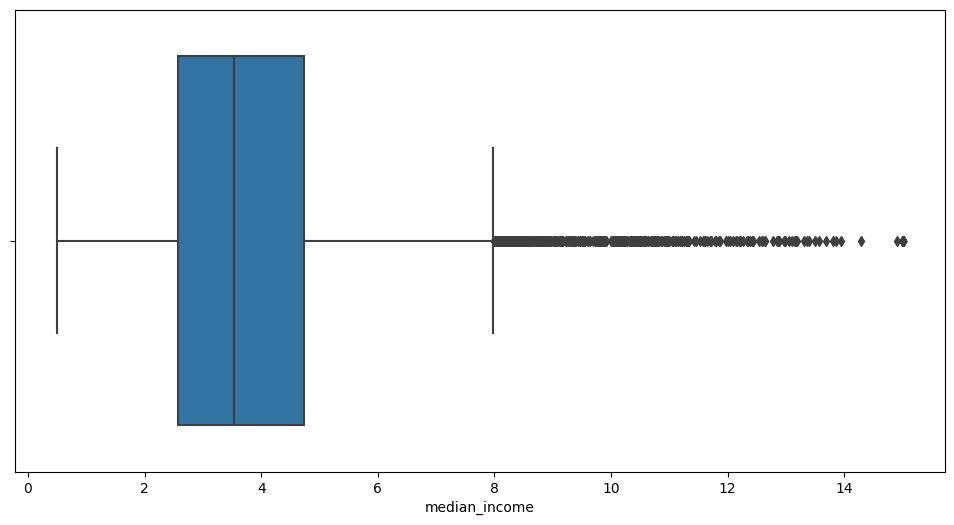

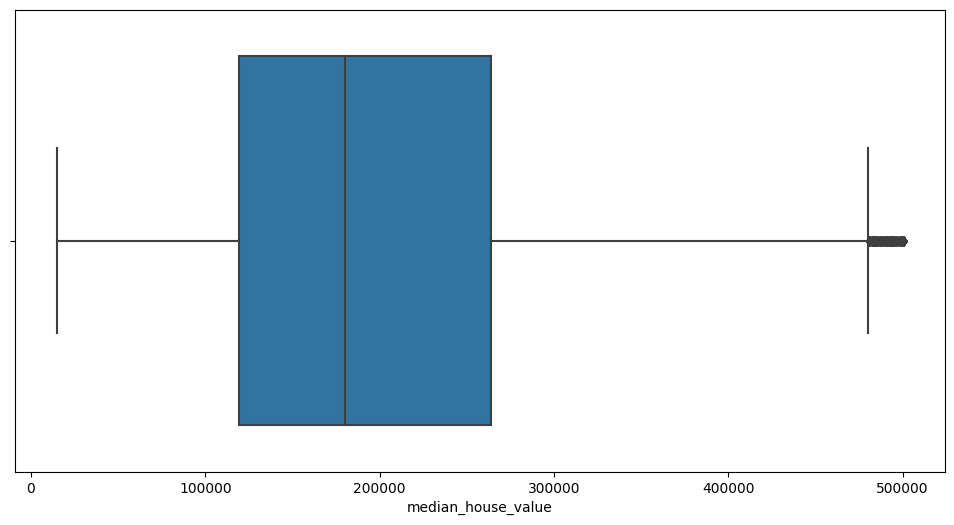

In [31]:
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data_model,ax=ax)

__Insight :__ 
Terdapat outlier pada kolom 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'

Handling outlier:

In [32]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data_model):
    q1 = data_model.quantile(0.25)
    q3 = data_model.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    lower = q1 - iqr*1.5
    upper = q3 + iqr*1.5
    print(f'IQR: {iqr}')

    n = len(data_model)
    n_upper = len(np.where(data_model > upper)[0])/n
    n_lower = len(np.where(data_model < lower)[0])/n

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')
    print(f'Persentase: {round((n_upper + n_lower)*100, 2)}')

**total_rooms**

In [33]:
# Outliers pada fitur total_rooms
find_anomalies(data_model['total_rooms'])

IQR: 1697.0
limit_bawah: -1094.5
limit_atas: 5693.5
Persentase: 6.23


In [34]:
# Cek deskriptif statistik kolom total_rooms
data_model['total_rooms'].describe()

count    14446.000000
mean      2640.285339
std       2191.704433
min          2.000000
25%       1451.000000
50%       2125.000000
75%       3148.000000
max      32627.000000
Name: total_rooms, dtype: float64

In [35]:
# Cek total_rooms > 5693.5
data_model[data_model['total_rooms'] > 5693.5].count()['total_rooms']

900

__Insight :__ 
Terlihat bahwa 75% data pada kolom total_rooms berjumlah kurang dari 3148, sedangkan jumlah maksimalnya adalah 32627. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 900 data yang jumlahnya lebih besar dari 5693.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki jumlah lebih besar dari  5693.5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

Text(0.5, 0, 'Range Selected total_rooms')

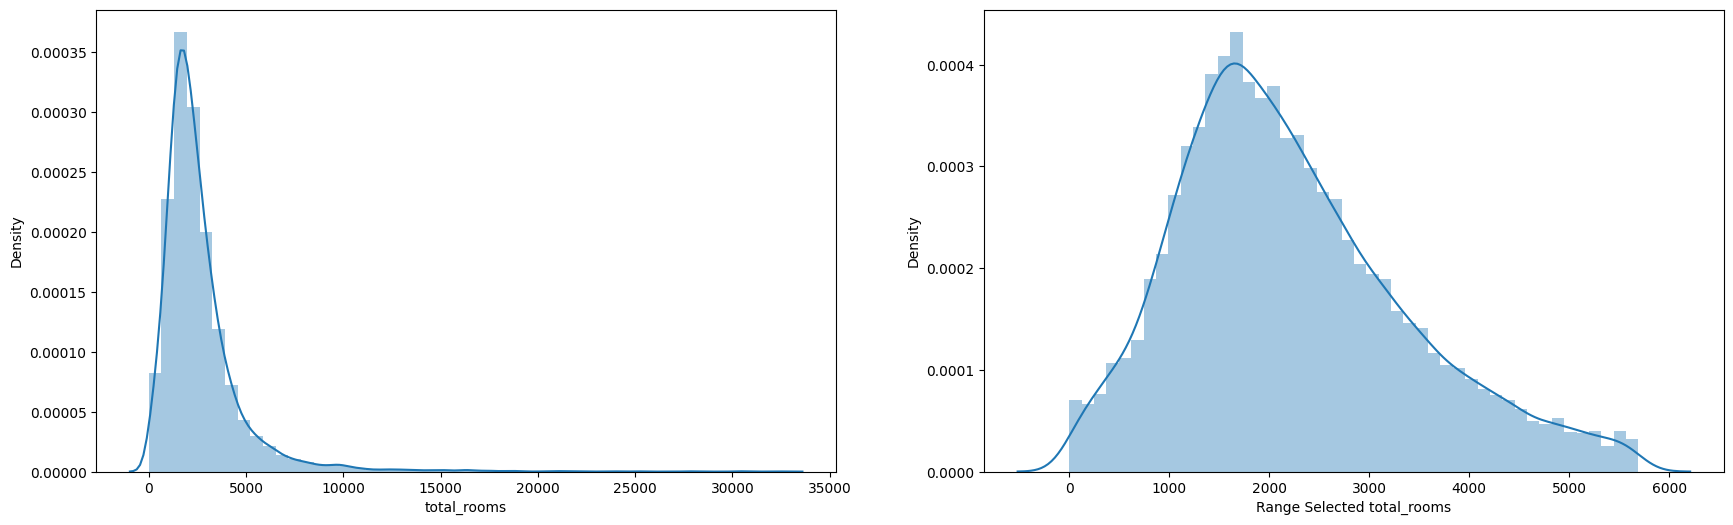

In [36]:
# Melakukan filtering pada data
data_model = data_model[(data_model['total_rooms'] <= 5693.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data['total_rooms'], ax=axes[0])
sns.distplot(data_model['total_rooms'], ax=axes[1])
axes[0].set_xlabel('total_rooms')
axes[1].set_xlabel('Range Selected total_rooms')

**total_bedrooms**

In [37]:
# Outliers pada fitur total_bedrooms
find_anomalies(data_model['total_bedrooms'])

IQR: 309.0
limit_bawah: -176.5
limit_atas: 1059.5
Persentase: 2.64


In [38]:
# Cek deskriptif statistik kolom total_bedrooms
data_model['total_bedrooms'].describe()

count    13546.000000
mean       462.844677
std        253.376585
min          1.000000
25%        287.000000
50%        417.000000
75%        596.000000
max       2610.000000
Name: total_bedrooms, dtype: float64

In [39]:
# Cek total_bedrooms > 1059.5
data_model[data_model['total_bedrooms'] > 1059.5].count()['total_bedrooms']

357

Sama seperti pada kolom total_rooms, kolom total_bedrooms juga akan di handling outlier dengan nilai batas atas berdasarkan metode IQR.

Text(0.5, 0, 'Range Selected total_bedrooms')

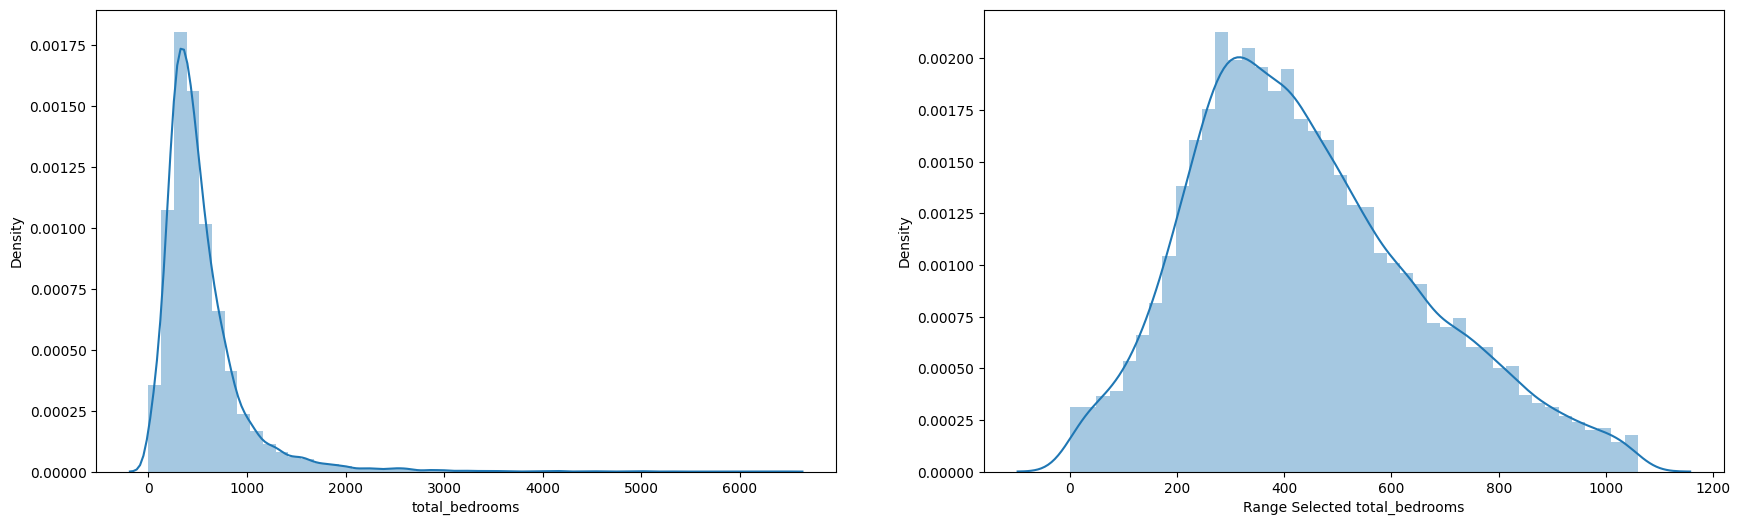

In [40]:
# Melakukan filtering pada data
data_model = data_model[(data_model['total_bedrooms'] <= 1059.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data['total_bedrooms'], ax=axes[0])
sns.distplot(data_model['total_bedrooms'], ax=axes[1])
axes[0].set_xlabel('total_bedrooms')
axes[1].set_xlabel('Range Selected total_bedrooms')

In [41]:
# Outliers pada fitur median_income
find_anomalies(data_model['median_income'])

IQR: 2.1543
limit_bawah: -0.6857500000000001
limit_atas: 7.93145
Persentase: 3.25


In [42]:
# Cek deskriptif statistik kolom median_income
data_model['median_income'].describe()

count    13189.000000
mean         3.833815
std          1.887396
min          0.499900
25%          2.545700
50%          3.513900
75%          4.700000
max         15.000100
Name: median_income, dtype: float64

In [43]:
# Cek median_income > 7.931
data_model[data_model['median_income'] > 7.931].count()['median_income']

429

Kolom median_income juga akan di handling outlier dengan nilai batas atas berdasarkan metode IQR. Hal ini berpacu pada measured tens of thousands.

Text(0.5, 0, 'Range Selected median_income')

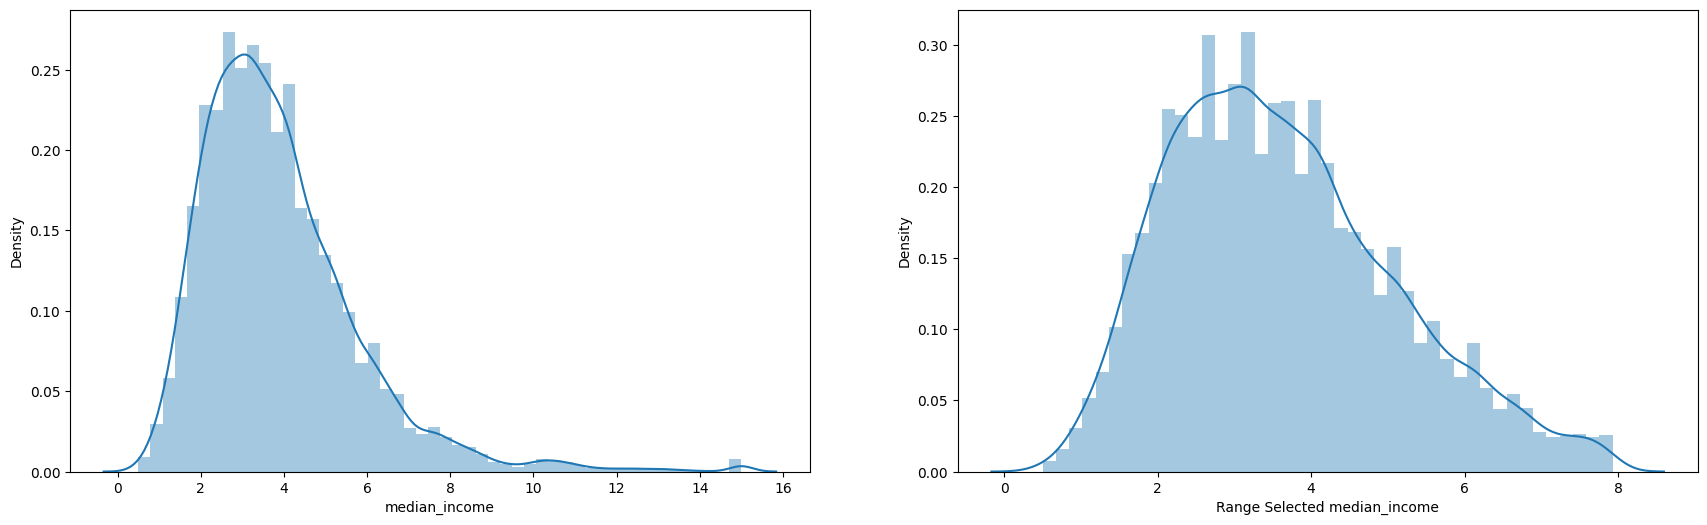

In [44]:
# Melakukan filtering pada data
data_model = data_model[(data_model['median_income'] <= 7.931)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data['median_income'], ax=axes[0])
sns.distplot(data_model['median_income'], ax=axes[1])
axes[0].set_xlabel('median_income')
axes[1].set_xlabel('Range Selected median_income')

In [45]:
# Outliers pada fitur median_house_value
find_anomalies(data_model['median_house_value'])

IQR: 135000.0
limit_bawah: -87500.0
limit_atas: 452500.0
Persentase: 3.63


In [46]:
# Cek deskriptif statistik kolom median_house_value
data_model['median_house_value'].describe()

count     12760.000000
mean     195805.095298
std      106095.658245
min       14999.000000
25%      115000.000000
50%      173450.000000
75%      250000.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [47]:
# Cek median_income > 452500.0
data_model[data_model['median_house_value'] > 452500.0].count()['median_house_value']

463

Kolom median_house_value juga akan di handling outlier dengan nilai batas atas berdasarkan metode IQR.

Text(0.5, 0, 'Range Selected median_house_value')

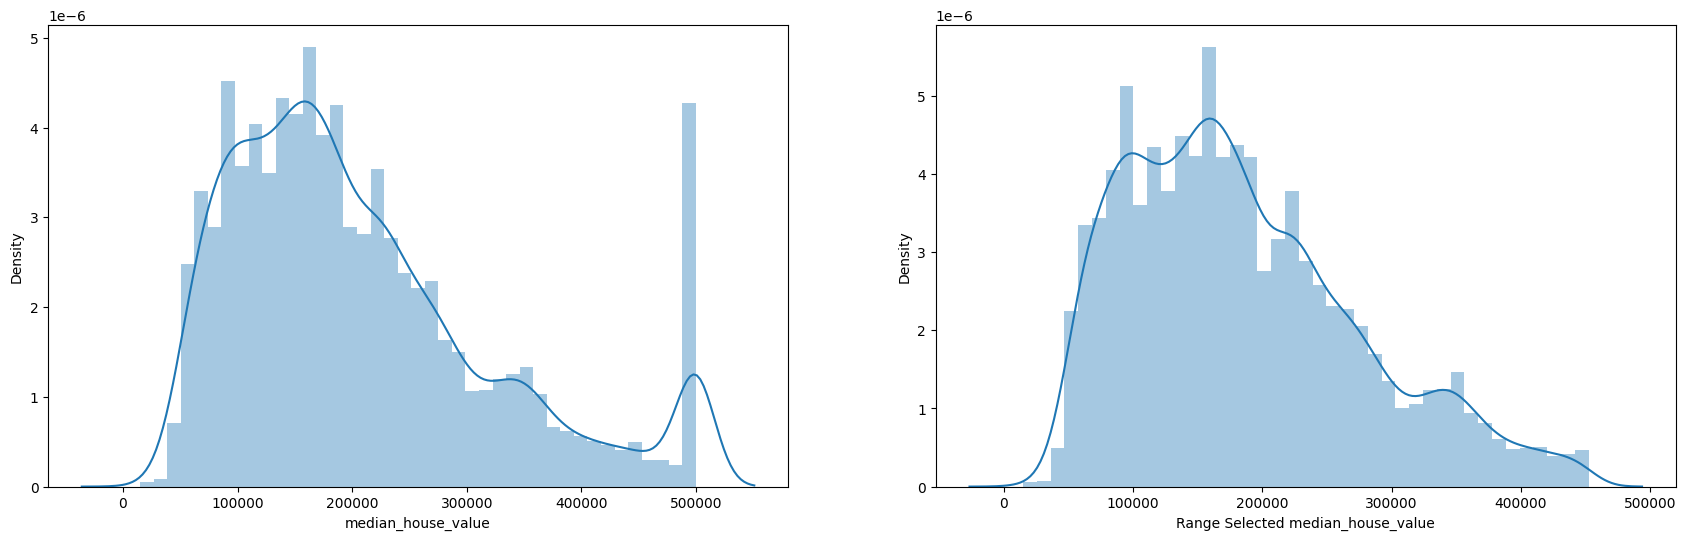

In [48]:
# Melakukan filtering pada data
data_model = data_model[(data_model['median_house_value'] <= 452500.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data['median_house_value'], ax=axes[0])
sns.distplot(data_model['median_house_value'], ax=axes[1])
axes[0].set_xlabel('median_house_value')
axes[1].set_xlabel('Range Selected median_house_value')

In [49]:
print(f'Jumlah baris dan kolom: {data_model.shape}')

Jumlah baris dan kolom: (12297, 10)


Setelah dilakukan handling outlier, pada akhirnya tersisa 12297 baris data yang akan digunakan untuk pemodelan.

In [50]:
#data_model.to_csv(r'D:\purwadhika\modul3\cp3\data_california_house_clear.csv')
data_model.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328,836.0,277.0,2.2604,NEAR OCEAN,100000.0
2,-118.04,33.87,17.0,2358.0,396,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194,606.0,167.0,2.2206,INLAND,59200.0
7,-121.26,38.69,17.0,3917.0,638,1809.0,564.0,5.2586,INLAND,137000.0


#### **Feature Engineering**

In [51]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

Feature Creation:

In [52]:
#rooms_per_household : berisikan informasi terkait total ruangan di dalam satu rumah 
data_model['rooms_per_household']=round(data_model['total_rooms']/data_model['households'])

#Abedrooms_per_room : Informasi terkait kamar tidur di dalam satu rumah
data_model['bedrooms_per_room']=round(data_model['total_bedrooms']/data_model['households'])

#population_per_household : Informasi terkait jumlah orang yang dapat tinggal di dalam satu rumah
data_model['population_per_household']=round(data_model['population']/data_model['households'])


Distance antar city: Informasi terkait seberapa jauh rumah terhadap pusat kota atau kota kota besar yang berada di California. Karena salah satu faktor untuk menentukan harga rumah dapat dilihat dari seberapa jauh rumah tersebut terhadap pusat kotak atau kota kota besar yang menjadi pusat bisnis di suatu wilayah.

In [53]:
def haversine(lat1, lon1, lat2, lon2):
    # Mengubah derajat menjadi radian
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Rumus haversine
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius bumi dalam kilometer
    return c * r

# Koordinat Los Angeles dan San Francisco
lat_LA, lon_LA = 34.05, -118.25
lat_SF, lon_SF = 37.77, -122.42
lat_Sac, lon_Sac = 38.58, -121.49
lat_SJ, lon_SJ = 37.34, -121.89
lat_SD, lon_SD = 32.72, -117.16

# Menghitung jarak ke Los Angeles dan San Francisco
data_model['distance_to_LA'] = data_model.apply(lambda row: haversine(row['latitude'], row['longitude'], lat_LA, lon_LA), axis=1)
data_model['distance_to_SF'] = data_model.apply(lambda row: haversine(row['latitude'], row['longitude'], lat_SF, lon_SF), axis=1)
data_model['distance_to_Sac'] = data_model.apply(lambda row: haversine(row['latitude'], row['longitude'], lat_Sac, lon_Sac), axis=1)
data_model['distance_to_SJ'] = data_model.apply(lambda row: haversine(row['latitude'], row['longitude'], lat_SJ, lon_SJ), axis=1)
data_model['distance_to_SD'] = data_model.apply(lambda row: haversine(row['latitude'], row['longitude'], lat_SD, lon_SD), axis=1)


In [54]:
#data_model.to_csv(r'D:\purwadhika\modul3\cp3\data_california_house_clear.csv')

In [55]:
data_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,distance_to_LA,distance_to_SF,distance_to_Sac,distance_to_SJ,distance_to_SD
0,-119.79,36.73,52.0,112.0,28,193.0,40.0,1.9750,INLAND,47500.0,3.0,1.0,5.0,329.065723,259.912510,254.377641,198.354556,506.488043
1,-122.21,37.77,43.0,1017.0,328,836.0,277.0,2.2604,NEAR OCEAN,100000.0,4.0,1.0,3.0,546.043461,18.458345,109.877908,55.514635,724.741151
2,-118.04,33.87,17.0,2358.0,396,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.0,1.0,4.0,27.851731,586.378240,608.203429,519.536961,151.791983
4,-119.81,36.73,50.0,772.0,194,606.0,167.0,2.2206,INLAND,59200.0,5.0,1.0,4.0,329.838549,258.328567,253.346102,196.687370,507.357029
7,-121.26,38.69,17.0,3917.0,638,1809.0,564.0,5.2586,INLAND,137000.0,7.0,1.0,3.0,581.995146,143.981622,23.424524,159.936242,759.862271


Proses scaling dan encoding:

Agar dapat menggunakan semua fitur yang dipilih, maka fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_model['ocean_proximity'] = le.fit_transform(data_model['ocean_proximity'])

In [57]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['ocean_proximity'])
], remainder='passthrough')

In [58]:
data_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,distance_to_LA,distance_to_SF,distance_to_Sac,distance_to_SJ,distance_to_SD
0,-119.79,36.73,52.0,112.0,28,193.0,40.0,1.9750,1,47500.0,3.0,1.0,5.0,329.065723,259.912510,254.377641,198.354556,506.488043
1,-122.21,37.77,43.0,1017.0,328,836.0,277.0,2.2604,2,100000.0,4.0,1.0,3.0,546.043461,18.458345,109.877908,55.514635,724.741151
2,-118.04,33.87,17.0,2358.0,396,1387.0,364.0,6.2990,0,285800.0,6.0,1.0,4.0,27.851731,586.378240,608.203429,519.536961,151.791983
4,-119.81,36.73,50.0,772.0,194,606.0,167.0,2.2206,1,59200.0,5.0,1.0,4.0,329.838549,258.328567,253.346102,196.687370,507.357029
7,-121.26,38.69,17.0,3917.0,638,1809.0,564.0,5.2586,1,137000.0,7.0,1.0,3.0,581.995146,143.981622,23.424524,159.936242,759.862271


Feature Selection:

Bagi dataset menjadi train set dan test set:

In [59]:
# Memisahkan data independen variabel dengan target
X = data_model.drop(['median_house_value'], axis=1)
y = data_model['median_house_value']

In [60]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

In [61]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(
#     data,
#     test_size=0.20,
#     random_state=8
# )
# print(train.shape, test.shape)

### `Modeling`

**Model Experiment**

Bandingkan model regresi atau untuk mendapatkan benchmark model:

In [62]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-56671.27655357 -58336.55361449 -52466.85338553 -90237.57418883
 -56571.01706907] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-40139.89743256 -41223.47479197 -37281.80828011 -42038.98393728
 -40237.35323709] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.2359087  -0.24001079 -0.22615473 -0.26186016 -0.23615885] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-53086.46645046 -52471.34615755 -51228.93802772 -52210.53141922
 -51878.17578302] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-36703.42298859 -36090.79291917 -35774.6908126  -36550.20060989
 -35340.4153893 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [63]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
model_bench = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})
model_bench

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-62856.654962,13826.512073,-40184.303536,1609.284386,-0.240019,0.011841
1,KNN Regressor,-52175.091568,616.926648,-36091.904544,499.870349,-0.208135,0.003610
2,DecisionTree Regressor,-60773.196367,973.774452,-40243.530305,536.745617,-0.238773,0.005128
3,RandomForest Regressor,-43593.354672,1038.891793,-28630.999152,566.577531,-0.165347,0.003052
4,XGBoost Regressor,-41874.515050,881.135856,-27708.781678,608.865296,-0.161915,0.003212


__Insight :__ 
* Berdasarkan nilai RMSE, MAE, dan MAPE, XGBoost Regressor dan RandomForest Regressor adalaj dua model terbaik
* Selanjutnya akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost Regressor dan RandomForest Regressor.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost Regressor dan Random Forest Regressor

In [64]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,41742.599698,27736.061915,0.162285
RandomForest,43386.301386,28831.032179,0.166798


__Insight :__ 
Ketika dilakukan prediksi pada test set, performa XGBoost Regressor secara keseluruhan  sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE, MAE, dan MAPE yang sedikit lebih rendah dari RandomForest Regressor.


In [65]:
# train_result = model_bench[3:4].set_index('Model', drop = True)
# train_result1 = model_bench[2:3].set_index('Model', drop = True)
# merged = pd.concat([train_result, train_result1, score_before_tuning])
# merged.reset_index(inplace=True)
# merged.drop(columns = 'index', inplace = True)
# merged['Model'] = ['XGB Train', 'RandomForest Train',  'XGB Test', 'RandomForest Test']
# merged.set_index('Model', drop = True)
# merged[['Model', 'RMSE', 'MAE', 'MAPE']]

**Hyperparameter Tuning**

Karena model XGBoost Regressor memiliki performa yang sedikit lebih baik dari RandomForest Regressor, maka selanjutnya kita akan menggunakan model XGBoost Regressor ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost Regressor dengan harapan dapat meningkatkan performa model.

In [66]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [67]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [68]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           co...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [69]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
3,2.310704,0.032916,0.027108,0.005718,0.5,0.021544,166,8,0.1,9,...,601.966227,1,-0.167154,-0.158749,-0.164019,-0.172363,-0.166698,-0.165797,0.004441,1
7,3.657722,0.199093,0.016204,0.001289,0.9,0.059948,119,8,0.05,5,...,469.217831,2,-0.165993,-0.163859,-0.165567,-0.172571,-0.168418,-0.167282,0.003019,2
20,1.853308,0.105068,0.010836,0.001295,0.9,0.007743,143,4,0.38,6,...,551.475303,3,-0.174553,-0.168943,-0.170164,-0.179350,-0.177385,-0.174079,0.004016,3
22,0.942798,0.044894,0.012167,0.000695,0.7,0.002783,155,4,0.25,8,...,739.674240,4,-0.178353,-0.171854,-0.172658,-0.188453,-0.177593,-0.177782,0.005926,4
23,0.890347,0.015246,0.012395,0.001038,0.9,3.593814,153,4,0.33,9,...,873.134177,5,-0.182418,-0.175748,-0.172390,-0.187289,-0.173757,-0.178320,0.005654,5


In [70]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -39815.30611599322
Best_params: {'model__subsample': 0.5, 'model__reg_alpha': 0.021544346900318832, 'model__n_estimators': 166, 'model__max_depth': 8, 'model__learning_rate': 0.1, 'model__gamma': 9, 'model__colsample_bytree': 0.3}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost Regressor dan hyperparameter terpilih.

In [71]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,39399.574151,26425.164075,0.158455


In [72]:
# train_result = model_bench[2:3]
# merged = pd.concat([train_result, score_after_tuning])
# merged.reset_index(inplace=True)
# merged.drop(columns = 'index', inplace = True)
# merged['Model'] = ['XGB Train', 'XGB Test']
# merged.set_index('Model', drop = True)
# merged[['Model','MAE', 'MAPE', 'RMSE']]

**Performance Comparison**

Perbandingan performa model XGBoost Regressor sebelum dan sesudah dilakukan hyperparameter tuning.

In [73]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,41742.599698,27736.061915,0.162285


In [74]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,39399.574151,26425.164075,0.158455


__Insight :__ 
Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning.
- RMSE, MAE & MAPE sebelum tuning: 41742.59, 27736.06, 0.162
- RMSE, MAE & MAPE setelah tuning: 39399.57, 26425.16, 0.158

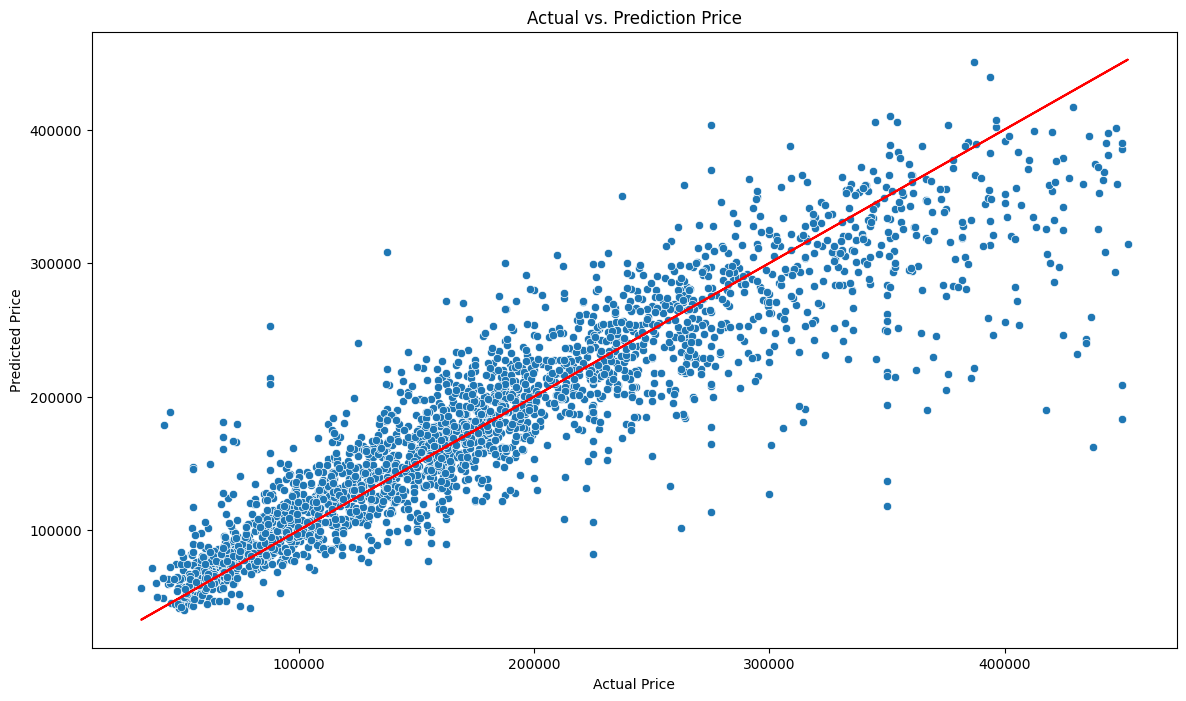

In [75]:
plt.figure(figsize=(14, 8))

plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price')
plt.plot(y_test, y_test, color='red', alpha=1)

Adanya nilai-nilai error yang membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang tinggi tapi diprediksi lebih rendah (underestimation), dan juga sebaliknya (overestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 15% menjadikan model ini dapat dikategorikan ke dalam 'good forecasting' (Lewis, 1982).


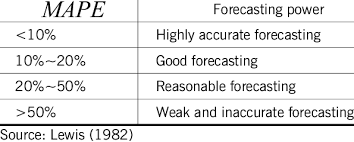

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (median_house_value), kita dapat mengeceknya melalui function feature_importances_.

In [76]:
# Diasumsikan transformer dan scaler sudah didefinisikan sebelumnya
# Diasumsikan x_train, y_train, x_test, dan y_test sudah didefinisikan sebelumnya

# Fit dan transformasikan transformer pada data latih (x_train)
x_train_transformed = transformer.fit_transform(X_train)

# Dapatkan nama-nama fitur yang telah ditransformasi
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Dapatkan nilai penting fitur dari model xgboost_tuning
feature_importances = pd.Series(xgb_tuning['model'].feature_importances_, feature_names).sort_values(ascending=False)

# Buat DataFrame dengan nilai penting fitur
feature_imp_df = feature_importances.to_frame(name='Nilai Penting Fitur')

# Tampilkan DataFrame
print(feature_imp_df)

                                     Nilai Penting Fitur
One Hot__ocean_proximity_1                      0.275079
remainder__rooms_per_household                  0.099910
remainder__distance_to_SD                       0.073286
remainder__population_per_household             0.068030
remainder__median_income                        0.065043
remainder__distance_to_SF                       0.060981
remainder__bedrooms_per_room                    0.051846
remainder__distance_to_Sac                      0.049283
remainder__distance_to_SJ                       0.048735
remainder__distance_to_LA                       0.047912
remainder__longitude                            0.044224
remainder__latitude                             0.033834
remainder__housing_median_age                   0.016475
remainder__population                           0.013899
One Hot__ocean_proximity_2                      0.013429
remainder__households                           0.013316
remainder__total_rooms         

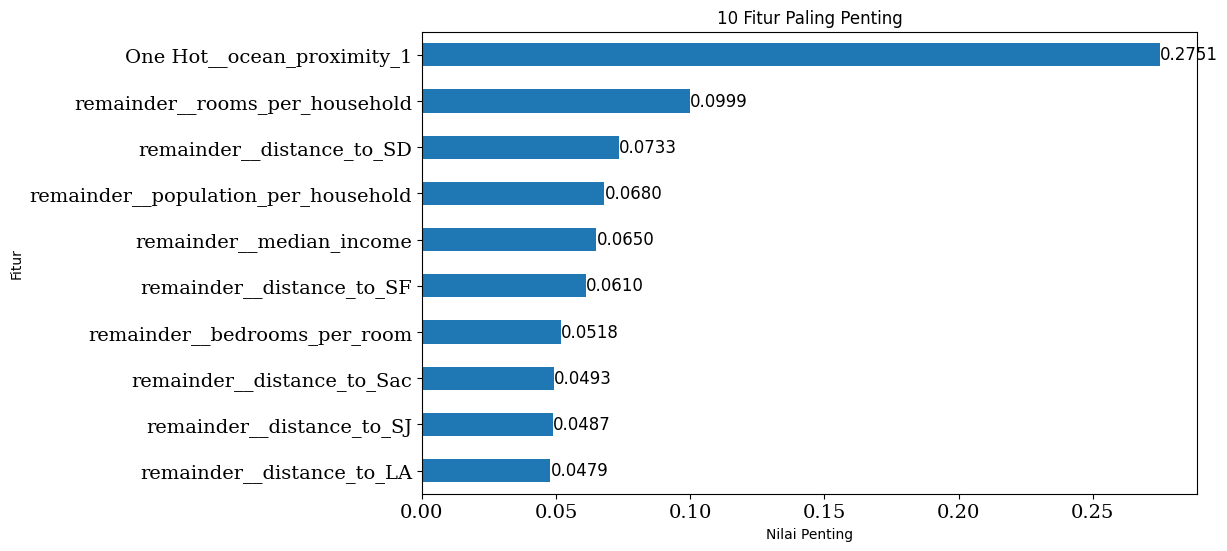

In [77]:
import matplotlib.pyplot as plt

# Anggap feature_importances telah dihitung sebelumnya

# Plot nilai penting fitur dalam bentuk diagram batang horizontal
plt.figure(figsize=(10, 6))
ax = feature_importances.head(10).sort_values().plot(kind='barh')
plt.xlabel('Nilai Penting')
plt.ylabel('Fitur')
plt.title('10 Fitur Paling Penting')

# Tambahkan nilai numerik di dalam setiap batang dengan ukuran font lebih kecil
for index, value in enumerate(feature_importances.head(10).sort_values()):
    ax.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=12)

# Atur font untuk keterangan sumbu X dan Y
font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 14}
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font)
ax.set_yticklabels(ax.get_yticklabels(), fontdict=font)

plt.show()

__Insight :__ 
Dari grafik diatas dapat terlihat bahwa fitur ocean_proximity menjadi fitur paling penting dengan nilai persentase 27%, lalu yang kedua adalah fitur rooms_per_household dengan nilai persentase 9.9%.

**Model Limitation**

Model limitation mengacu pada batasan-batasan atau keterbatasan yang dimiliki oleh model yang digunakan dalam proses pembelajaran mesin. Setiap model memiliki keterbatasan tertentu yang dapat mempengaruhi kinerja dan kemampuan model tersebut. Perlunya membuat model limitation untuk memahami keterbatasan model membantu Anda memiliki pendangan yang lebih realistis tentang apa yang dapat dicapai oleh model tersebut. Ini membantu menghindari ekspektasi yang tidak realistis dan mengarahkan eksperimen atau pengembangan model ke arah yang lebih produktif. 

In [78]:
# Residual = y_actual - y_prediksi
residual = y_test-y_pred_xgb_tuning

df_residual = pd.DataFrame({
    'y_pred': y_pred_xgb_tuning,
    'residual': residual 
})

df_residual.head()

,y_pred,residual
1679,186217.593750,-36617.593750
12774,246903.265625,25496.734375
10475,70940.851562,-14040.851562
9045,256312.250000,-18412.250000
13519,130200.554688,10799.445312


<Axes: xlabel='median_house_value', ylabel='Count'>

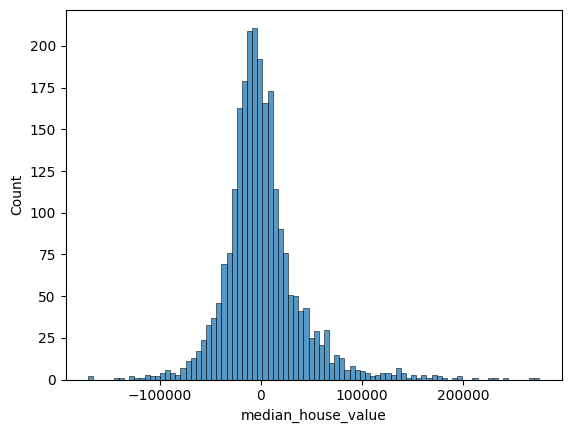

In [79]:
# Check apakah residual memiliki outlier

sns.histplot(data=df_residual,x=residual)

In [80]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df_residual)

if p_value > 0.05:
    print(p_value,"Data terdistribusi normal.")
else:
    print(p_value,"Data tidak terdistribusi normal.")

7.006492321624085e-43 Data tidak terdistribusi normal.


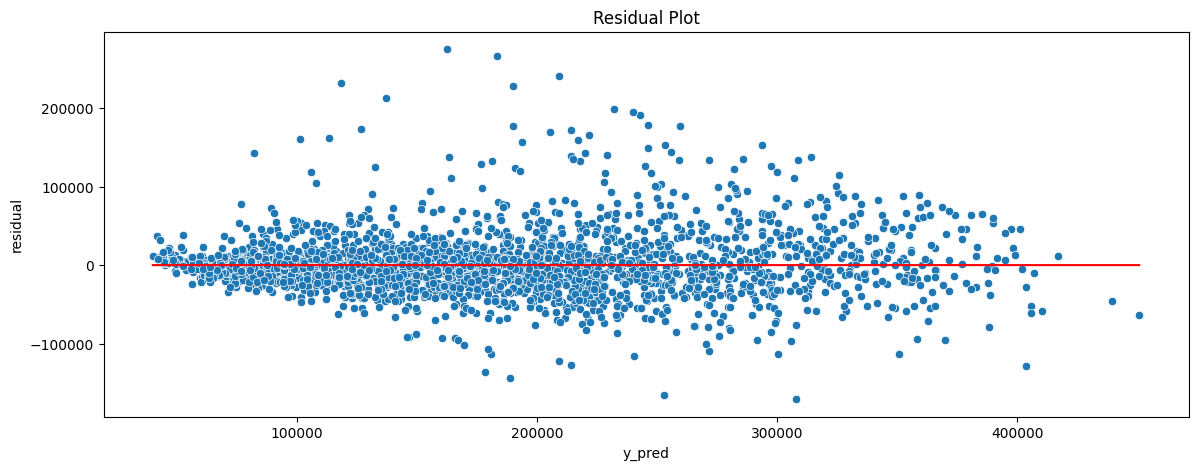

In [81]:
# Residual Plot

plt.figure(figsize=(14,5))
sns.scatterplot(data=df_residual, x='y_pred', y='residual')
sns.lineplot(data=df_residual, x='y_pred', y=0, color='red')
plt.title('Residual Plot')
plt.show()

In [82]:
from sklearn.metrics import mean_absolute_error

# Your code to create the data_y_pred DataFrame and list_ranges

data_y_pred = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_pred_xgb_tuning})
data_y_pred.reset_index(drop=True, inplace=True)
data_y_pred.sort_values('y_test').head(20)

list_ranges = [
    ("40001-50000", 40001, 50000),
    ("50001-60000", 50001, 60000),
    ("60001-70000", 60001, 70000),
    ("70001-80000", 70001, 80000),
    ("80001-90000", 80001, 90000),
    ("90001-100000", 90001, 100000),
    ("100001-150000", 100001, 150000),
    ("150001-200000", 150001, 200000),
    ("200001-250000", 200001, 250000),
    ("250001-300000", 250001, 300000),
    ("300001-350000", 300001, 350000),
    ("350001-400000", 350001, 400000),
    ("400001-450000", 400001, 450000),
    ("450001-500000", 450001, 500000)
]


list_mae = []
list_mape = []
list_len = []

for range_name, min_value, max_value in list_ranges:
    range_data = data_y_pred[(data_y_pred['y_test'] > min_value) & (data_y_pred['y_test'] <= max_value)]

    if len(range_data) > 0:  # Check if there are data points in the current range
        score_mae = mean_absolute_error(range_data['y_test'], range_data['y_test_pred'])
        score_mape = mean_absolute_percentage_error(range_data['y_test'], range_data['y_test_pred'])
        len_data = len(range_data)

        list_mae.append(score_mae)
        list_mape.append(score_mape*100)
        list_len.append(len_data)
    else:
        list_mae.append(None)  # No data in the range, you can assign a placeholder value or None
        list_mape.append(None)
        list_len.append(0)

range_metrics = pd.DataFrame({
    "Range Count": [range_name for range_name, _, _ in list_ranges],
    "Score MAE": list_mae,
    "Score MAPE (%)": list_mape,
    "Jumlah Data": list_len
})

range_metrics

,Range Count,Score MAE,Score MAPE (%),Jumlah Data
0,40001-50000,24778.421705,54.704754,23
1,50001-60000,16023.521875,28.894115,75
2,60001-70000,14820.765552,22.490738,107
3,70001-80000,17484.308247,23.565035,90
4,80001-90000,20751.639954,24.169996,99
5,90001-100000,16762.687658,17.572328,124
6,100001-150000,20382.067845,16.159358,478
7,150001-200000,22352.501661,12.902273,569
8,200001-250000,24609.952550,10.898845,326
9,250001-300000,31726.340089,11.590161,239


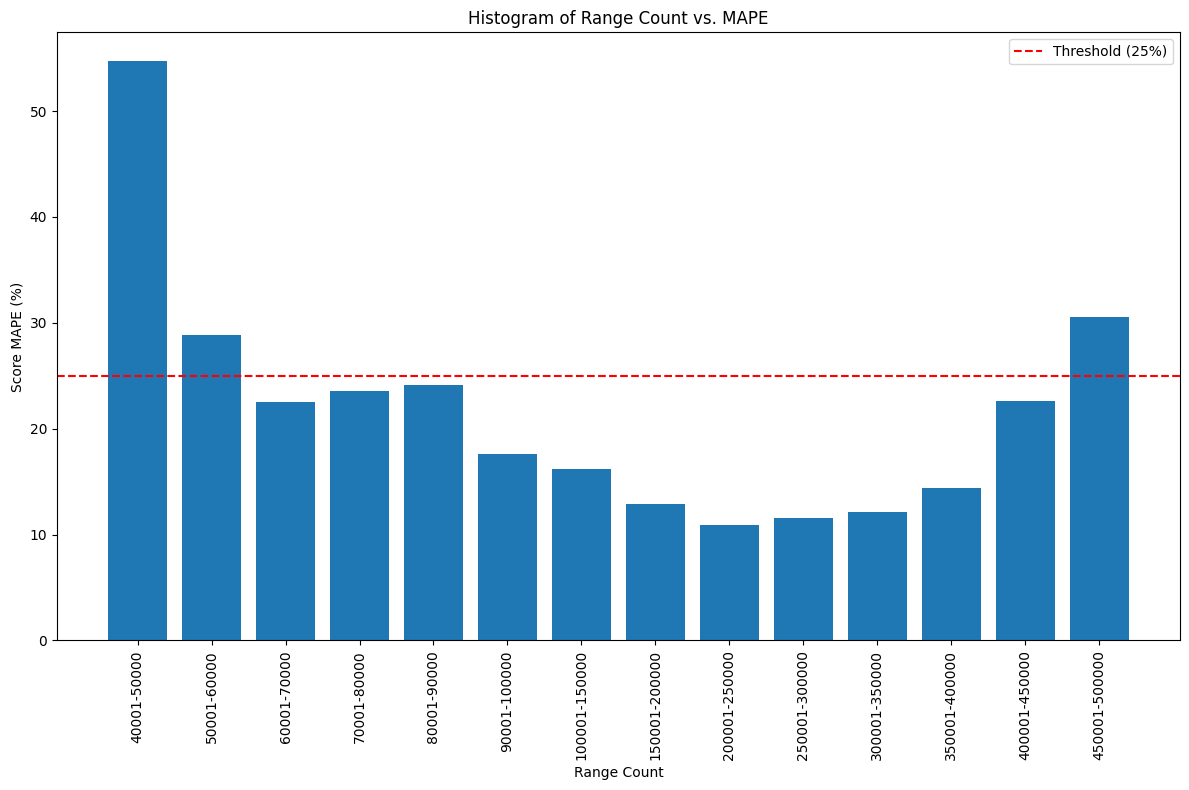

In [83]:
import matplotlib.pyplot as plt

# ... (your previous code)

# Plot histogram
plt.figure(figsize=(12, 8))
plt.bar(range_metrics["Range Count"], range_metrics["Score MAPE (%)"])
plt.xlabel("Range Count")
plt.ylabel("Score MAPE (%)")
plt.title("Histogram of Range Count vs. MAPE")
plt.xticks(rotation=90)

# Add a horizontal line at Y = 25
plt.axhline(y=25, color='red', linestyle='--', label='Threshold (25%)')

plt.tight_layout()
plt.legend()  # Show legend to indicate the threshold line
plt.show()

__Insight :__
Berdasarkan MAPE, dengan threshold 25% model akan bekerja secara maksimal dengan rentang harga dari USD 60000 sampai dengan USD 450000. https://escholarship.org/content/qt1f71t3x9/qt1f71t3x9.pdf?t=o5wul1#:~:text=A%20MAPE%20less%20than%205,in%20terms%20of%20its%20accuracy


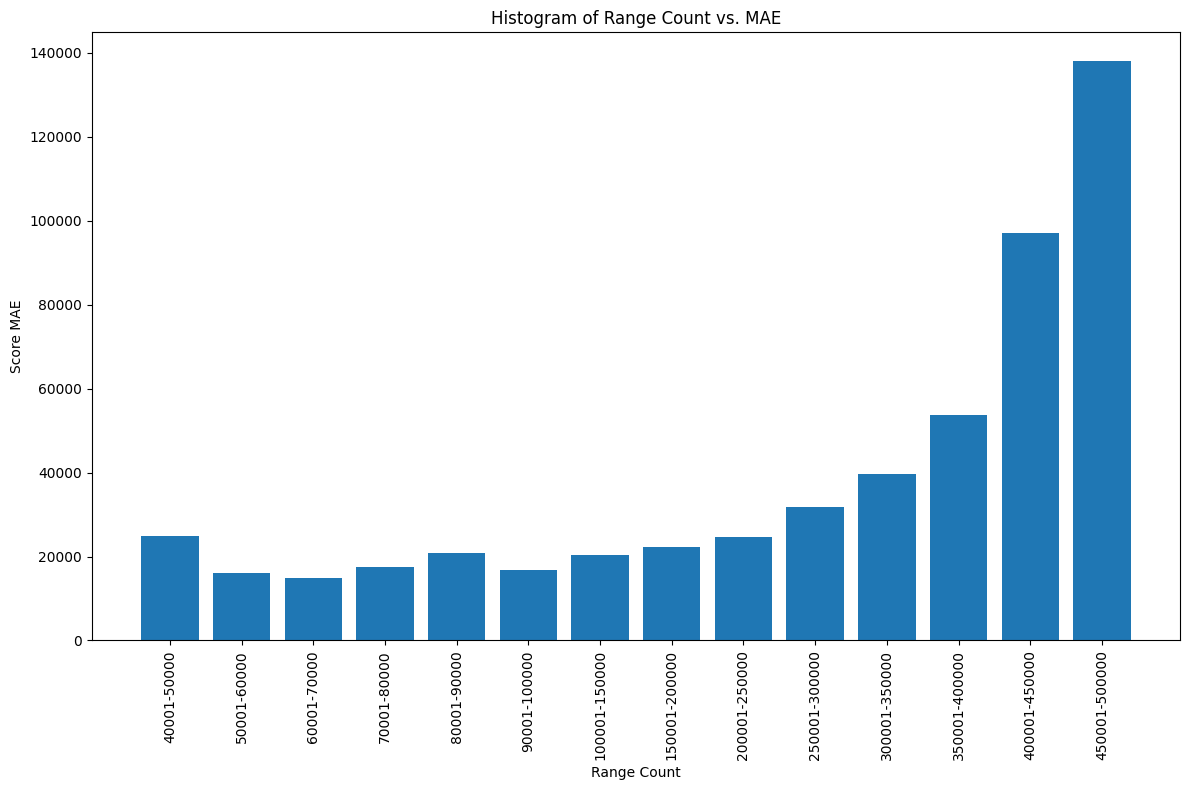

In [84]:
# Plot histogram
plt.figure(figsize=(12, 8))  # Enlarge the graph size
plt.bar(range_metrics["Range Count"], range_metrics["Score MAE"])
plt.xlabel("Range Count")
plt.ylabel("Score MAE")
plt.title("Histogram of Range Count vs. MAE")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### `Conclusion`

Berdasarkan pemodelan yang sudah dilakukan, fitur 'ocean_proximity' dan 'rooms_per_household' menjadi fitur yang paling berpengaruh terhadap 'median_house_value'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar 15%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga rumah di California pada rentang nilai seperti yang dilatih terhadap model (maksimal harga USD 452500), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 15% dari harga seharusnya. 
 
 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset.

 Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan keuntungan agen properti/broker. Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.  

### `Recommendations`

    Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap keuntungan yang didapat agen properti/broker.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('median_house_value'), seperti luas tanah dan luas bangunan. Selain itu, adanya penambahan data terkini untuk harga rumah tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br>   
4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi update harga rumah.

#### **Save Model**

In [85]:
# #Save model
# import pickle

# pickle.dump(xgb_tuning, open('Model_California_Price_XGB.sav', 'wb'))

In [86]:
# #Load model
# filename = 'Model_California_Price_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [87]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

39399.57415069338